# Race Studio 3 Data Processing

<div class="alert alert-block alert-success">
<b>TLDR:</b> Scroll to the <a href="#work-with-data" title="Work With Data">Work With Data</a> section at the bottom of this notebook to begin working with the RaceStudio3 data.  Everything above is related to configuration and data processing.
</div>

# Initial Configuration

Run this module before running anything else.

## Install Necessary Python Packages

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Initialize Python Packages

In [2]:
import pint
import pandas as pd
import pint_pandas
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import scipy.io
from typing import Iterable, Optional
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


from race_analysis.constants import *


from race_analysis.units import u, Q_
pint_pandas.PintType.ureg = u
pint_pandas.PintType.ureg.setup_matplotlib()

# Utility Functions

## Data Manipulation and Exporting Functions

Useful functions that handle exporting data to `.csv` files, converting series to their base-unit values, and more.

In [3]:
from race_analysis.df_utils import *

## Data Exporting Functions
Useful helper functions for exporting data.

In [4]:
from race_analysis.export_data import export_data_to_csv, mat_to_csv, mats_to_csv
from race_analysis.utils import get_files_with_extension, get_data_files, get_filename

## Plotting Functions

Helper functions to simplify the data-plotting process.

In [5]:
from race_analysis.plot_data import *
from race_analysis.map_data import *

# Initialize Race Data from Spreadsheet

This code takes formatted race data from a `.csv` file and parses it into [`Pandas Dataframes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), [`Pint`](https://pint.readthedocs.io/en/stable/) Unit objects, and [`Pint Pandas`](https://pint.readthedocs.io/en/0.18/pint-pandas.html) dataframe extension so that computations can be easily performed on the data.

## Compute Laps

Since the data exported from RaceStudio3 does not include the lap number or lap-related parameters, the below codeblock uses ML to determine the probable location of the start of the lap (based on the `GPS Latitude` and `GPS Longitude` values and their repetitiveness).  It then initializes a bunch of Lap-specific parameters that would be useful for the analysis.

In [6]:
from race_analysis.laps_data import *

#####################################################################
#### USE THIS FUNCTION TO UPDATE THE DATA FILES WITH LAP NUMBERS ####
#####################################################################
# # # from race_analysis.laps_data import set_lap_num_in_data_csv
# # # set_lap_num_in_data_csv()

## Set Custom Columns

This is where custom columns and math channels are defined.  The master `RACE_DATA_DF` dataframe includes all race data, including columns for these newly defined channels.

In [7]:
from race_analysis.columns import set_delta

## Build RaceStudio3 Dataframe

This is the code that initializes the data structure to be used throughout this Jupyter Notebook.

In [8]:
from race_analysis.race import *

## Retrieve Commonly Used Column Names

In [9]:
from race_analysis.column_names import *

# Work with Data

## Define Vehicle Constants

These are the constants and values associated with the car, as well as where said values were sourced.

In [10]:
from race_analysis.constants import *

#### MOTOR SPECIFICATIONS ####
electric_motor_mass = 22 * u.kg             # https://www.electricmotorsport.com/me1616-brushless-65hp-liquid-cooled-ipm-motor-24-120v.html
"""Mass of the ME1616 electric motor"""

electric_power_continuous = 20 * u.kW       # https://www.electricmotorsport.com/me1616-brushless-65hp-liquid-cooled-ipm-motor-24-120v.html
"""Continuous power for the ME1616 electric motor"""
electric_power_peak = 55 * u.kW             # https://www.electricmotorsport.com/me1616-brushless-65hp-liquid-cooled-ipm-motor-24-120v.html
"""Peak power for the ME1616 electric motor"""

electric_stall_torque = 134 * u.N * u.m     # https://www.electricmotorsport.com/me1616-brushless-65hp-liquid-cooled-ipm-motor-24-120v.html
"""Stall torque for the ME1616 electric motor"""
electric_continuous_torque = 55 * u.N * u.m # https://www.miromax.lt/userfiles/6/files/ME%20MAX%201507_1616%20%20AIR_Water%20Cooled%2020kW_55kW_96V_.pdf
"""Continuous torque for the ME1616 electric motor at 250 Amps"""
##############################















dsdd












wefwa
l,t A







#### BASIC CALCULATIONS ####
torque_gas = (POWER_GAS_AT_WHEELS / PEAK_GAS_RPM).to(u.N * u.m)
"""Torque of the gas-powered vehicle"""
TMR_gas = torque_gas / MASS_CAR
"""Torque-Mass ratio of the gas-powered vehicle"""
PMR_gas = POWER_GAS_AT_WHEELS / MASS_CAR
"""Power-Mass ratio of the gas-powered vehicle"""
############################

print(f'PEAK GAS ANGULAR SPEED\t{PEAK_GAS_RPM.to_base_units()}')
print(f'GAS POWER IN WATTS    \t{POWER_GAS_AT_WHEELS.to(u.W)}')
print(f'TORQUE OF GAS MOTOR   \t{torque_gas}')
print(f'TORQUE-MASS RATIO (GAS)\t{TMR_gas}')
print(f'POWER-MASS RATIO (GAS)\t{PMR_gas.to(u.kW / u.kg)}')

avg_power = (.5 * electric_power_continuous + .5 * electric_power_peak)
on_elec_per_lap = 30 * u.sec
num_laps = 25

total_energy = avg_power*on_elec_per_lap*num_laps
print(f'TOTAL ENERGY\t\t{total_energy.to(u.kWh)}')
print(f'AVERAGE POWER\t\t{avg_power}')
operating_voltage = 96 * u.V
print(f'OPERATING AMPERAGE\t{(avg_power/operating_voltage).to(u.amp)}')
print(f'TOTAL AMP HOURS\t\t{(total_energy / operating_voltage).to(u.amp * u.hr)}')

print(f'EV ENERGY PER LAP\t{(total_energy / num_laps).to(u.kWh)}')

battery_mass_density = 55 * u.Wh / u.lb

print(f'BATTERY MASS\t\t{(total_energy / battery_mass_density).to_base_units()}')


PEAK GAS ANGULAR SPEED	1235.6931104119853 radian / second
GAS POWER IN WATTS    	108126.48137942917 watt
TORQUE OF GAS MOTOR   	87.50269825764373 meter * newton
TORQUE-MASS RATIO (GAS)	0.17057056190573827 meter * newton / kilogram
POWER-MASS RATIO (GAS)	0.21077286818602176 kilowatt / kilogram
TOTAL ENERGY		7.8125 kilowatt_hour
AVERAGE POWER		37.5 kilowatt
OPERATING AMPERAGE	390.625 ampere
TOTAL AMP HOURS		81.38020833333334 ampere * hour
EV ENERGY PER LAP	0.3125 kilowatt_hour
BATTERY MASS		64.43073437500001 kilogram


## Load in Data

Define the filepath of the data file you are trying to load in, as well as the corresponding `units` dictionary containing that dataset's units values.

> The `units` dictionary is helpful, but not critical due to Pint's builtin unit-handling capabilities.  This is a remnant of an older implementation of some functionality that @HenryAsa hasn't yet removed.

In [11]:
RACE_DATA_FILEPATH = f'{DATA_DIRECTORY}/BETTER_20230831_143833_Blair Hosie_Rush SR 150_Palmer ACW_a_0045.csv'
UNITS: dict[str, str] = {}

RACE_DATA_DF = load_race(race_data_filepath=RACE_DATA_FILEPATH, units=UNITS)
"""All Race Data stored in a Pandas Dataframe with Pint Units built-in to handle unit conversions and unit operations"""

'All Race Data stored in a Pandas Dataframe with Pint Units built-in to handle unit conversions and unit operations'

## Generate Plots for Data

In [12]:
# speed_during_coast = pd.Series(RACE_DATA_DF['GPS Speed'] * RACE_DATA_DF['GPS CST On'], name='Speed During Coasting')
# plot_data(RACE_DATA_DF['Time'], f'Time ({UNITS["Time"]})', speed_during_coast.pint.to('miles/hr'), 'Vehicle Speed During Coasting (miles/hr)')

# acceleration_during_coast = pd.Series(RACE_DATA_DF['GPS Speed'].diff().fillna(0) * RACE_DATA_DF['GPS CST On'] / RACE_DATA_DF['dT'].replace(0, np.nan), name='Acceleration During Coasting')
# plot_data(RACE_DATA_DF['Time'], f'Time ({UNITS["Time"]})', acceleration_during_coast.pint.to('m/(s^2)'), 'Acceleration During Coasting (m/(s^2))')

## Determine Drag Coefficient of the Vehicle

$$F_D = \frac{1}{2}\rho v^2 C_D A$$
where $F_D$ is the drag force, $\rho$ is the density of the fluid (air), $v$ is the speed of the vehicle relative to the fluid, $C_D$ is the drag coefficient, and $A$ is the cross-sectional area of the vehicle.

Rearranged, the coefficient of drag can be determined by:

$$C_D = \frac{2 F_D}{\rho v^2 A}$$

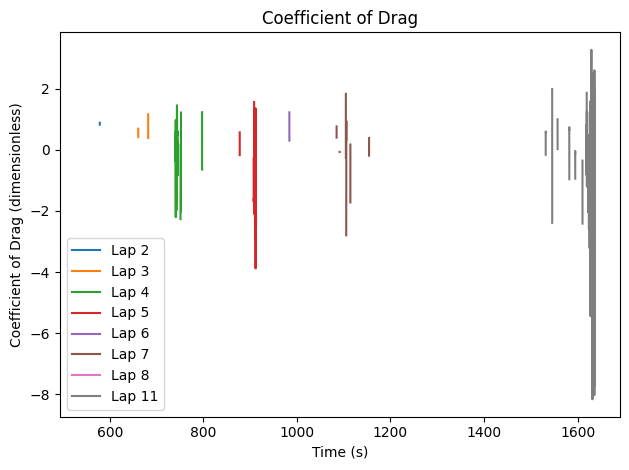

In [13]:
def plot_coefficient_of_drag(df: pd.DataFrame, units: dict[str, str]) -> None:

    #### Drag Calculations ####
    speed_during_coast = columns_during_state(
        df=RACE_DATA_DF,
        data_columns='GPS Speed',
        state_columns='GPS CST On',
        append_to_column_name='During Coasting',
        fill_with_zeros=True,
    )
    acceleration_during_coast = columns_during_state(
        df=RACE_DATA_DF,
        data_columns='Acceleration',
        state_columns='GPS CST On',
        append_to_column_name='During Coasting',
        fill_with_zeros=True,
    )

    drag_force = pd.Series(data=acceleration_during_coast * MASS_VEHICLE, name='Drag Force')
    drag_coefficient = pd.Series(data=((2*drag_force) / (RHO_AIR * (speed_during_coast**2) * VEHICLE_CROSS_SECTIONAL_AREA)), name='Coefficient of Drag')
    ###########################

    legend_values = []
    lap_indices = get_lap_indices(df)

    for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
        start_lap_index, end_lap_index = lap_indices[lap_num]

        valid_lap_times = slice_into_df(df[COL_TIME], start_lap_index, end_lap_index)
        valid_drag_coefficients = slice_into_df(drag_coefficient, start_lap_index, end_lap_index)

        legend_values.append(f'Lap {lap_num}')
        plt.title(f'Coefficient of Drag')
        plot_data(valid_lap_times, f'Time ({units[COL_TIME]})', valid_drag_coefficients.pint.to_base_units(), f'Coefficient of Drag ({valid_drag_coefficients.pint.to_base_units().pint.units})')
        plt.legend(legend_values)
        # plt.show()

plot_coefficient_of_drag(df=RACE_DATA_DF, units=UNITS)

# Plotting

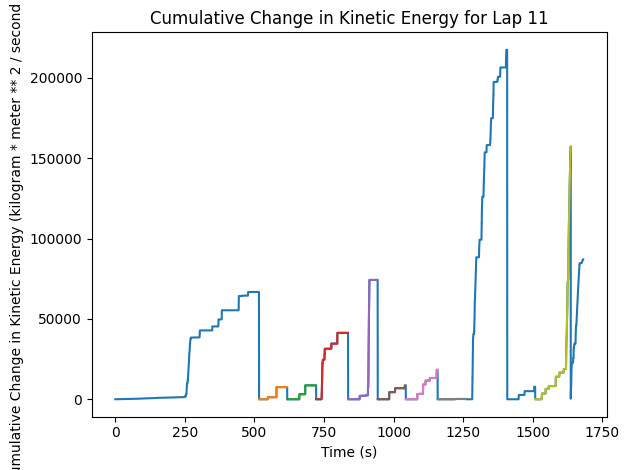

In [14]:
cumulative_ke_change = pd.Series(data=RACE_DATA_DF.groupby(COL_LAP_NUM)['Delta KE'].apply(lambda x: x.cumsum()))

cumulative_ke_change_during_coast = pd.Series(data=(
    RACE_DATA_DF.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', 'GPS CST On']].apply(
        lambda x: (x['Delta KE'] * x['GPS CST On']).cumsum())))

abs_cumulative_ke_change_during_coast = pd.Series(data=(
    RACE_DATA_DF.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', 'GPS CST On']].apply(
        lambda x: (abs(x['Delta KE']) * x['GPS CST On']).cumsum())))

# cumulative_ke_change_during_coast = pd.Series(data=(RACE_DATA_DF * RACE_DATA_DF['GPS CST On']).groupby(COL_LAP_NUM)['Delta KE'].apply(lambda x: x.cumsum()))
# cumulative_ke_change_during_coast = pd.Series(data=strip_df_of_units(RACE_DATA_DF.groupby(COL_LAP_NUM)['Delta KE']).cumsum(), dtype=f'pint[{UNITS["Delta KE"]}]')

plt.title(f'Cumulative Change in Kinetic Energy by Lap')
plot_data(RACE_DATA_DF[COL_TIME], f'Time ({UNITS[COL_TIME]})', abs_cumulative_ke_change_during_coast.pint.to_base_units(), f'Cumulative Change in Kinetic Energy ({abs_cumulative_ke_change_during_coast.pint.to_base_units().pint.units})')

lap_indices = get_lap_indices(RACE_DATA_DF)

for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
    start_lap_index, end_lap_index = lap_indices[lap_num]

    valid_lap_times = slice_into_df(RACE_DATA_DF[COL_TIME], start_lap_index, end_lap_index)
    lap_cum_KE = slice_into_df(abs_cumulative_ke_change_during_coast, start_lap_index, end_lap_index)

    plt.title(f'Cumulative Change in Kinetic Energy for Lap {lap_num}')
    plot_data(valid_lap_times, f'Time ({UNITS[COL_TIME]})', lap_cum_KE.pint.to_base_units(), f'Cumulative Change in Kinetic Energy ({lap_cum_KE.pint.to_base_units().pint.units})')

## Regenerative Braking Calculations

data/formatted/BETTER_20230831_143833_Blair Hosie_Rush SR 150_Palmer ACW_a_0045.csv


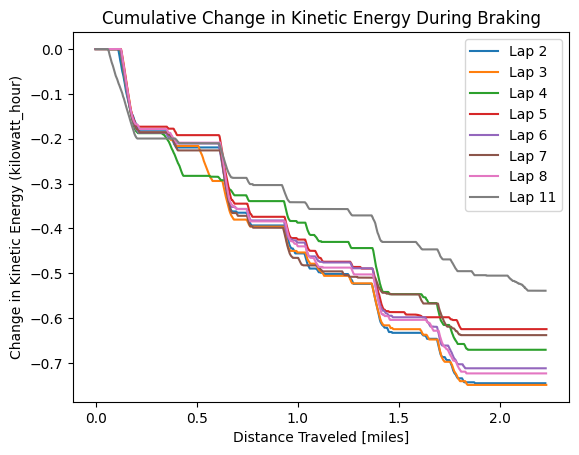

data/formatted/BETTER_20240127_1528_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1215.csv


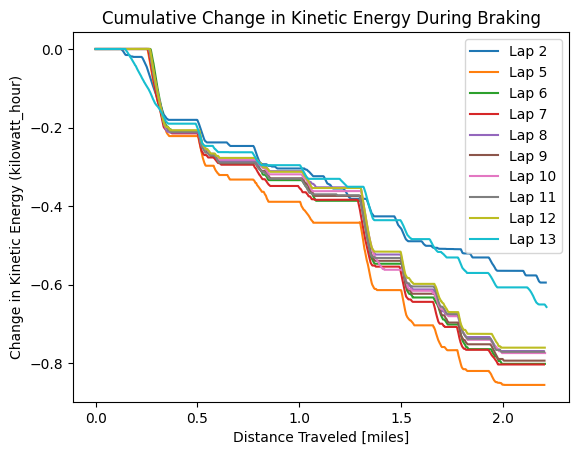

data/formatted/BETTER_20240126_1228_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1194.csv


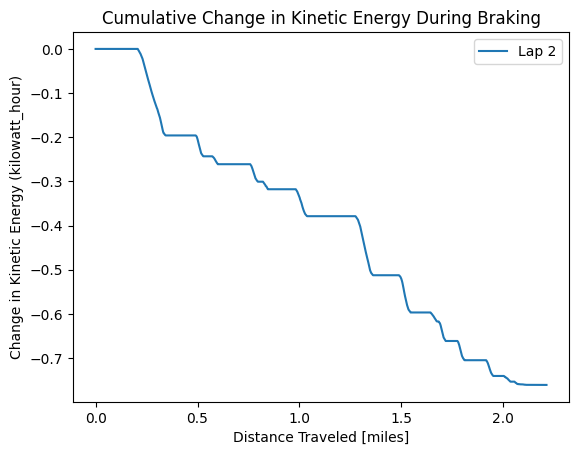

data/formatted/BETTER_20240126_1357_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1196.csv


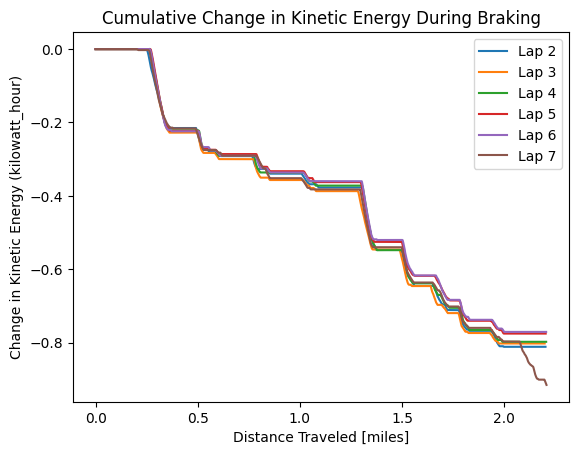

data/formatted/BETTER_20240126_1604_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1199.csv


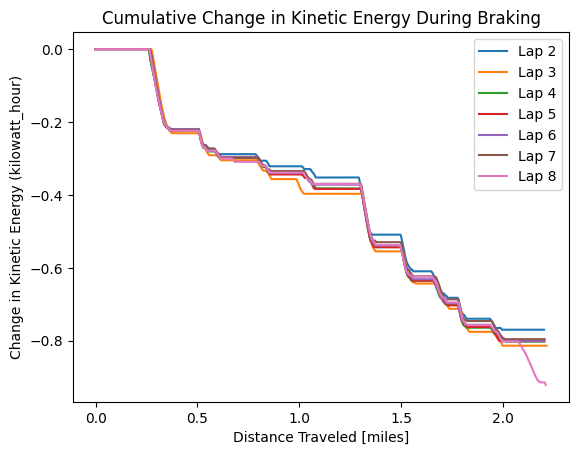

data/formatted/BETTER_20240126_1502_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1198.csv


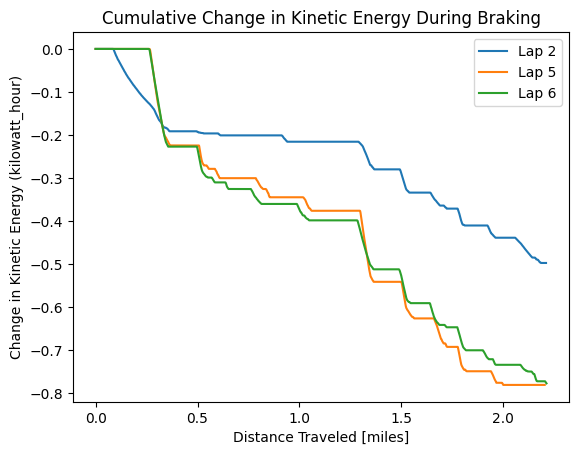

data/formatted/BETTER_20240127_1014_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1207.csv


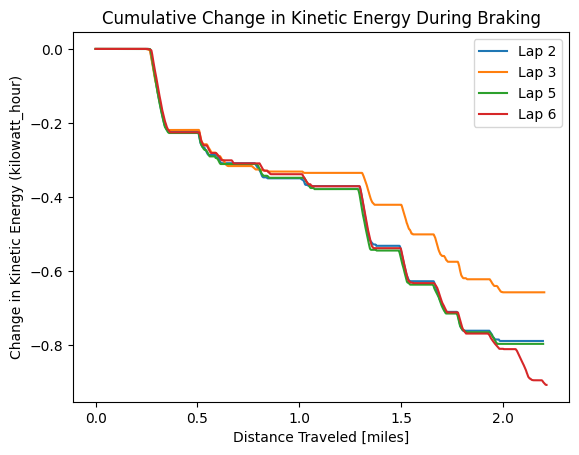

data/formatted/BETTER_20240127_1107_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1209.csv


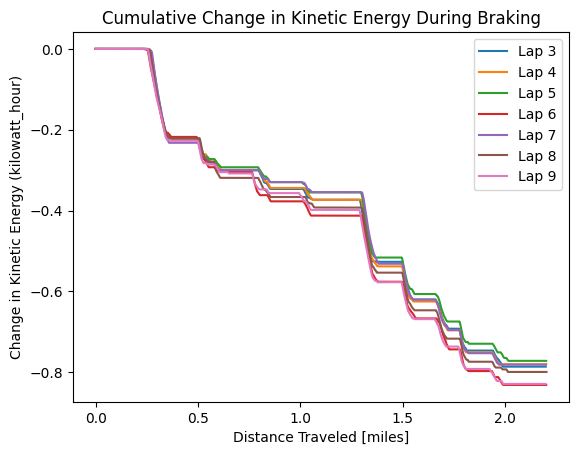

data/formatted/BETTER_20240126_1140_Blair Hosie_Rush SR 0003_PODIUM_Generic testing_a_1192.csv


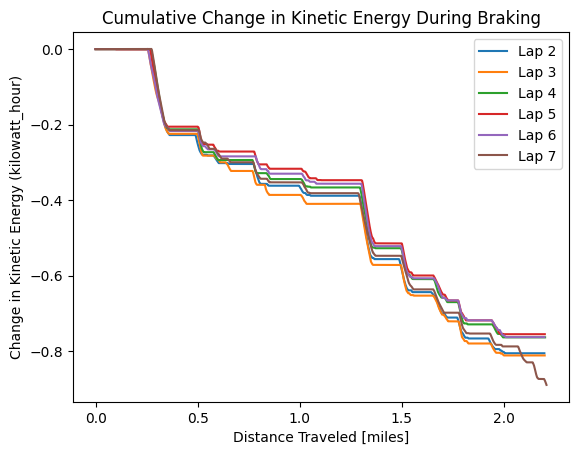

In [15]:
def regen_calculations(df: pd.DataFrame, data_filepath: str) -> None:

    cumulative_ke_change = pd.Series(data=df.groupby(COL_LAP_NUM)['Delta KE'].apply(lambda x: x.cumsum()))

    cumulative_ke_change_during_coast = pd.Series(data=(
        df.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', COL_BRAKING_ON]].apply(
            lambda x: (x['Delta KE'] * x[COL_BRAKING_ON]).cumsum())))

    # abs_cumulative_ke_change_during_coast = pd.Series(data=(
    #     df.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', 'GPS CST On']].apply(
    #         lambda x: (abs(x['Delta KE']) * x['GPS CST On']).cumsum())))

    # cumulative_ke_change_during_coast = pd.Series(data=(df * df['GPS CST On']).groupby('Lap Number')['Delta KE'].apply(lambda x: x.cumsum()))
    # cumulative_ke_change_during_coast = pd.Series(data=strip_df_of_units(df.groupby(COL_LAP_NUM)['Delta KE']).cumsum(), dtype=f'pint[{UNITS["Delta KE"]}]')

    # plt.title(f'Cumulative Change in Kinetic Energy by Lap')
    # plot_data(df[COL_TIME], f'Time ({UNITS[COL_TIME]})', abs_cumulative_ke_change_during_coast.pint.to_base_units(), f'Cumulative Change in Kinetic Energy ({abs_cumulative_ke_change_during_coast.pint.to_base_units().pint.units})')

    lap_indices = get_lap_indices(df)
    energy_units = 'kilowatthours'

    for lap_num in get_usable_lap_nums(data_filepath):
        start_lap_index, end_lap_index = lap_indices[lap_num]

        valid_lap_times = slice_into_df(df[COL_TIME], start_lap_index, end_lap_index)
        zeroed_lap_times = reset_lap_times(valid_lap_times)

        lap_cum_KE = slice_into_df(cumulative_ke_change_during_coast, start_lap_index, end_lap_index)
        valid_car_distance = slice_into_df(df['Distance on GPS Speed'], start_lap_index, end_lap_index)
        reset_distances = valid_car_distance - valid_car_distance.iloc[0]

        # plt.plot(zeroed_lap_times, lap_cum_KE.pint.to(energy_units), label=f'Lap {lap_num}')
        plt.plot(reset_distances.pint.to('miles'), lap_cum_KE.pint.to(energy_units), label=f'Lap {lap_num}')
        # plot_data(zeroed_lap_times, f'Time ({UNITS["Time"]})', reset_distances.pint.to('miles'), f'Vehicle Speed ({valid_car_distance.pint.to("miles").pint.units})')

    plt.xlabel(f'Distance Traveled [miles]')
    # plt.xlabel(f'Time ({UNITS[COL_TIME]})')
    plt.ylabel(f'Change in Kinetic Energy ({lap_cum_KE.pint.to(energy_units).pint.units})')
    plt.legend()
    plt.title(f'Cumulative Change in Kinetic Energy During Braking')
    save_plot(data_filepath)
    plt.show()


def determine_regen_for_all_data():
    data_files = get_data_files()

    for data_filepath in data_files:
        print(data_filepath)
        UNITS: dict[str, str] = {}
        race_data_df = load_race(race_data_filepath=data_filepath, units=UNITS)

        regen_calculations(race_data_df, data_filepath)

determine_regen_for_all_data()
# regen_calculations(RACE_DATA_DF, RACE_DATA_FILEPATH)

## Actual Graphs

### Cumulative Regen

In [16]:
from race_analysis.map_data import plot_map_every_lap


def plot_cumulative_regen_all_tracks(
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_files = get_data_files()

    for data_filepath in data_files:
        UNITS: dict[str, str] = {}
        race_data_df = load_race(race_data_filepath=data_filepath, units=UNITS)

        energy_units = 'kilowatthours'
        cumulative_ke_change_during_braking = pd.Series(data=(
            race_data_df.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', COL_BRAKING_ON]].apply(
            lambda x: (x['Delta KE'] * x[COL_BRAKING_ON]).cumsum())), name='Energy Recuperation During Braking').reset_index(level=0, drop=True)

        plot_map_every_lap(
            df=race_data_df,
            data_to_plot=cumulative_ke_change_during_braking.pint.to(energy_units),
            data_units=energy_units,
            colorbar_label=f'KiloWatt Hours',
            data_filepath=data_filepath,
            save_plots=save_plots,
            show_plots=True,
        )

# plot_cumulative_regen_all_tracks()

### Parameters During Braking

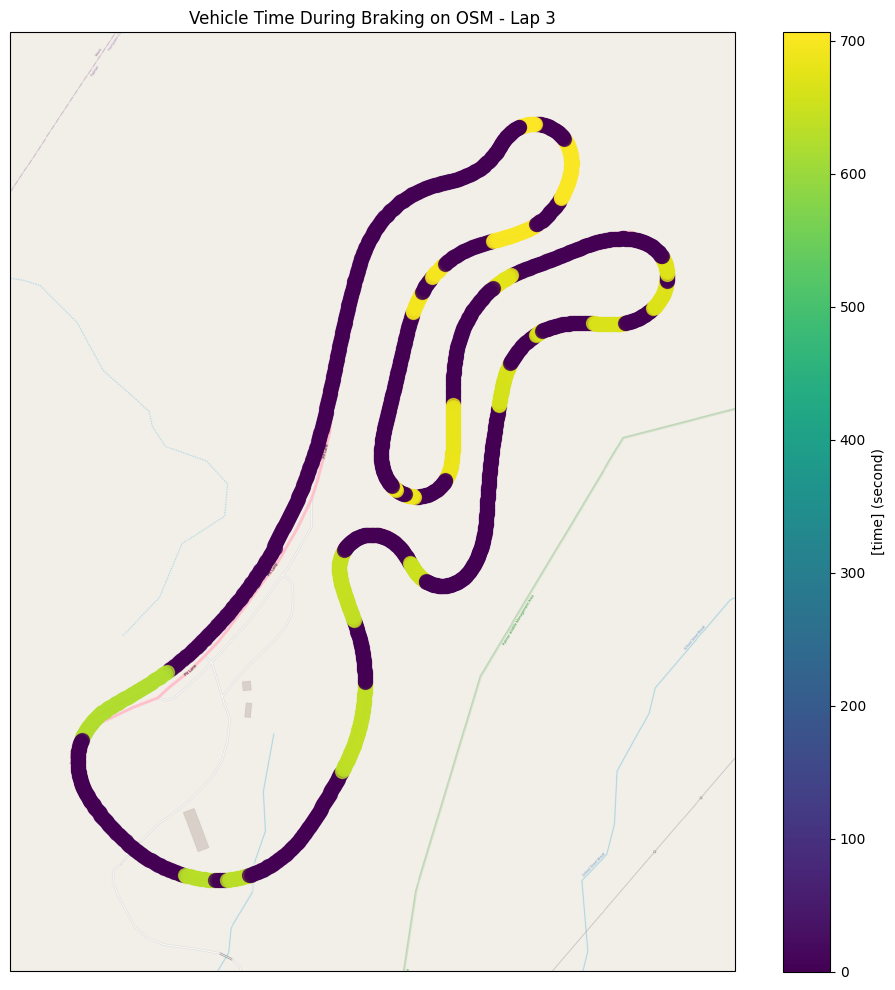

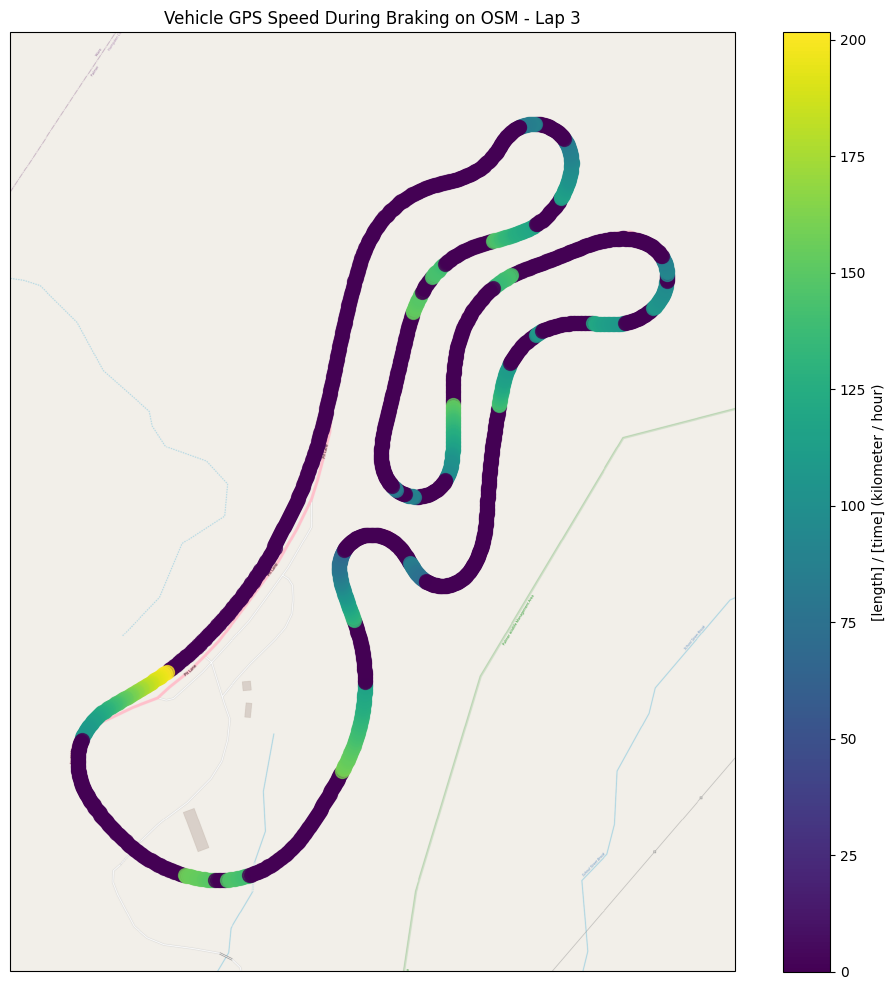

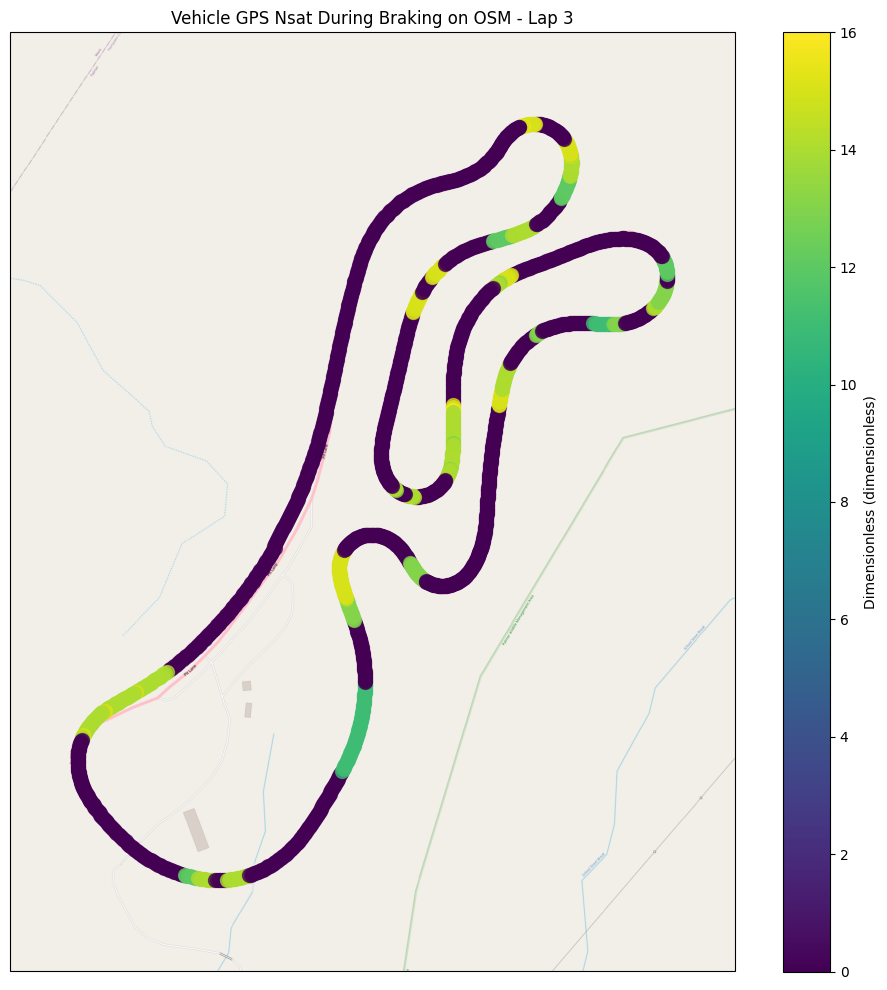

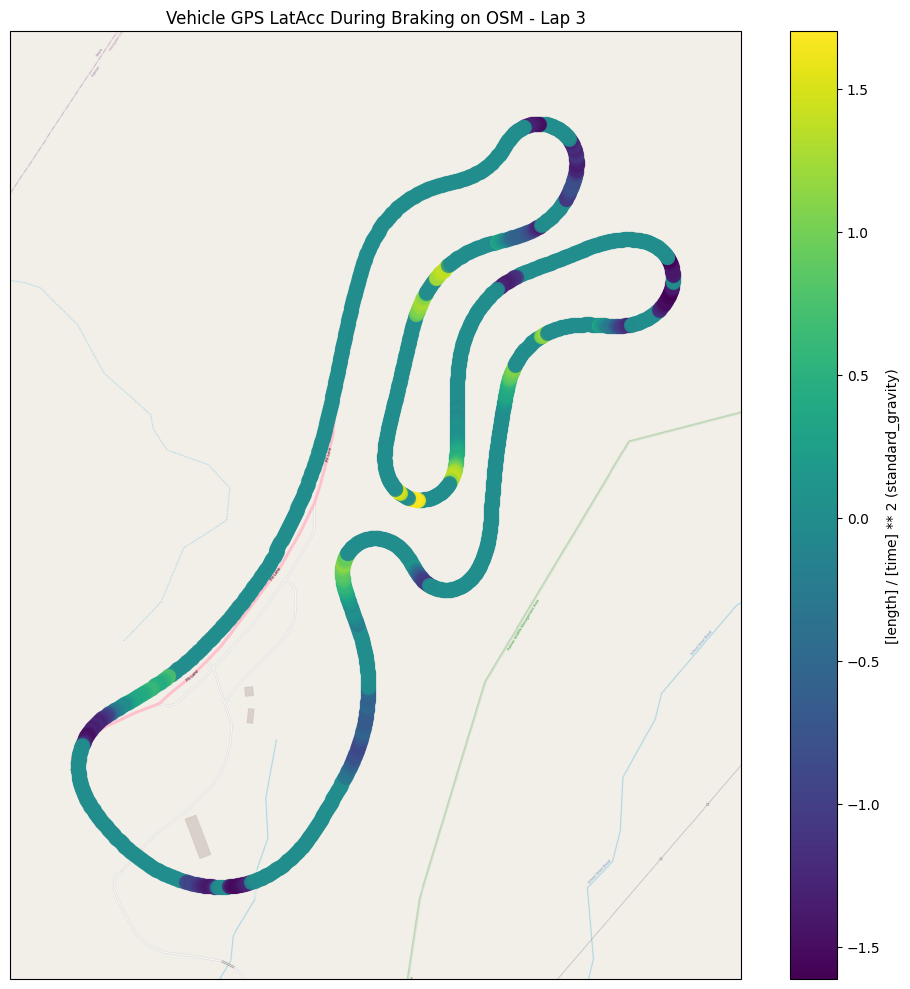

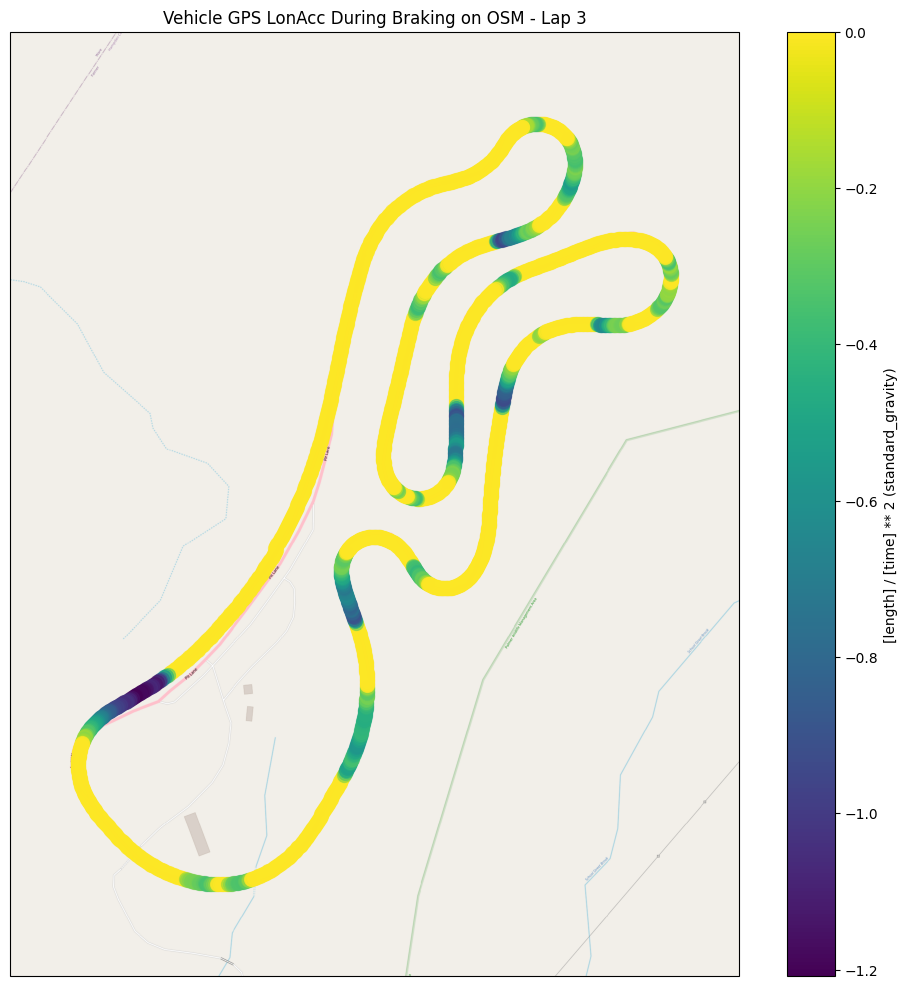

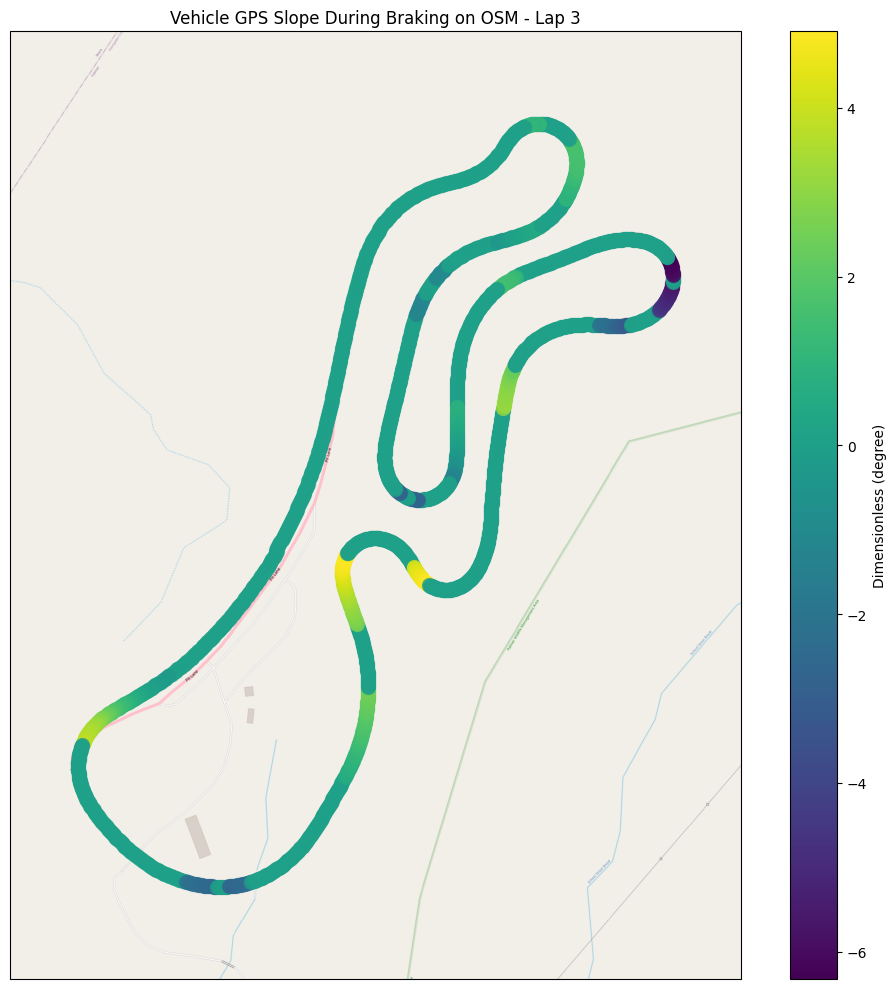

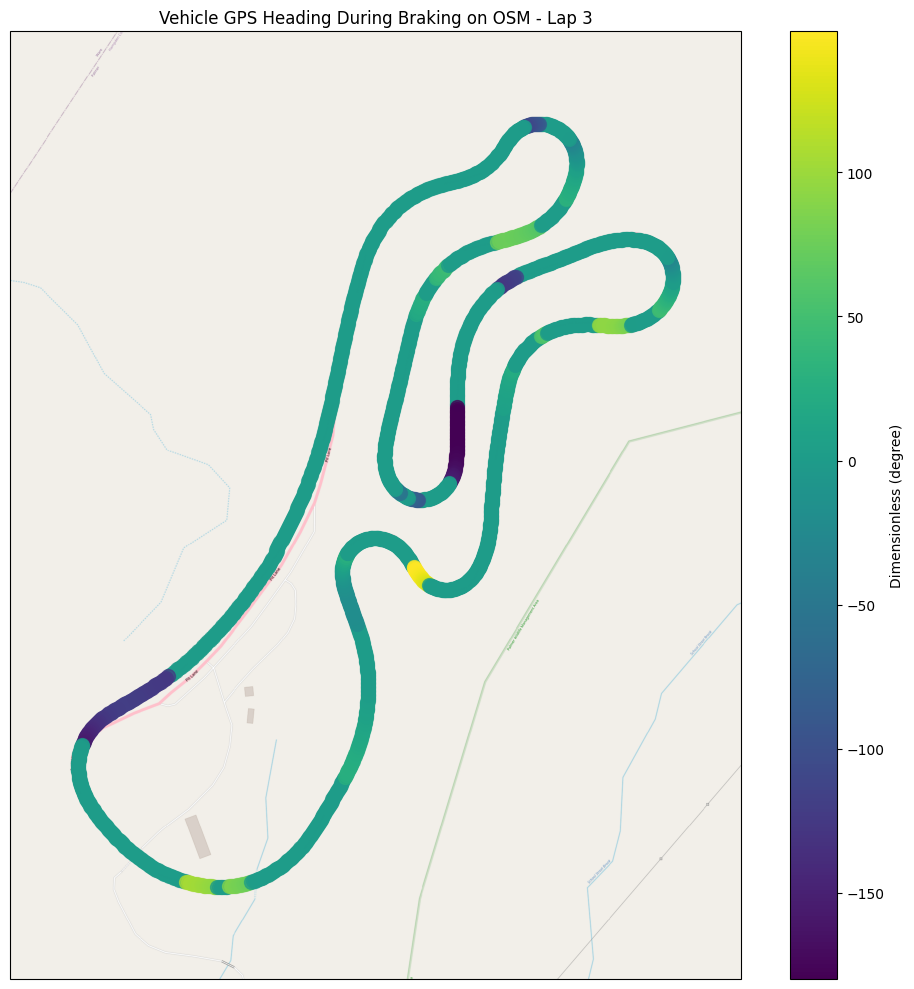

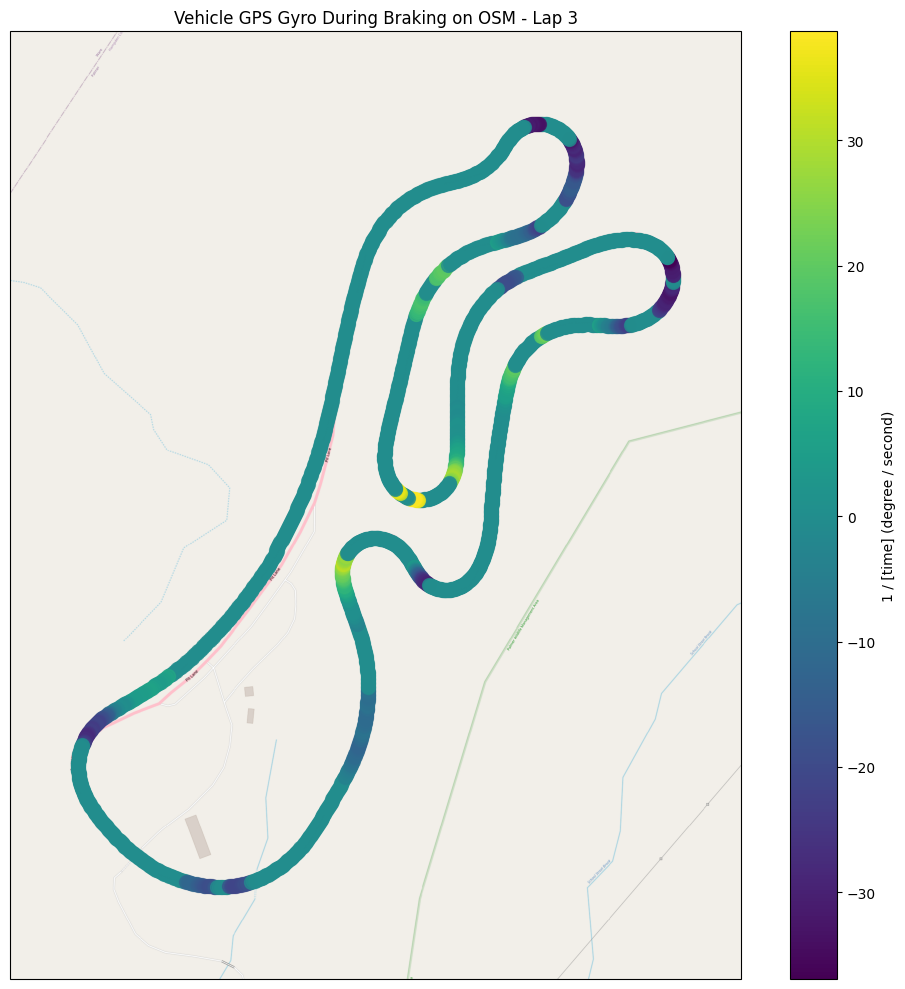

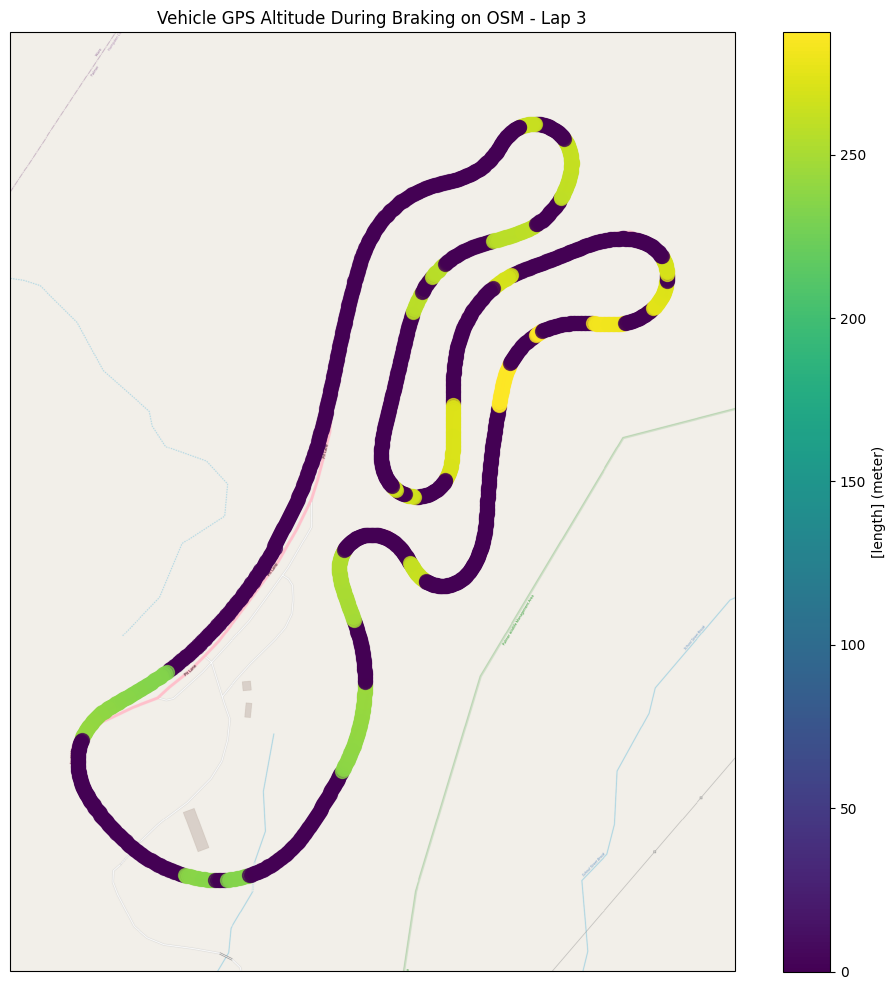

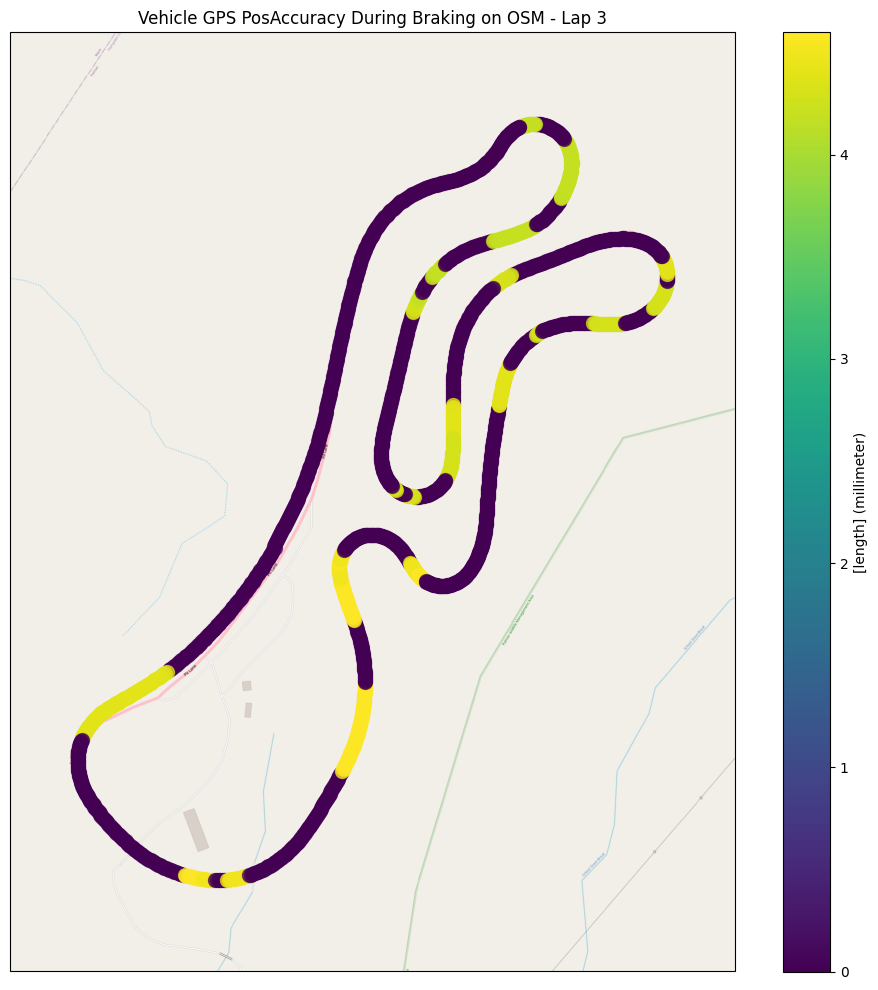

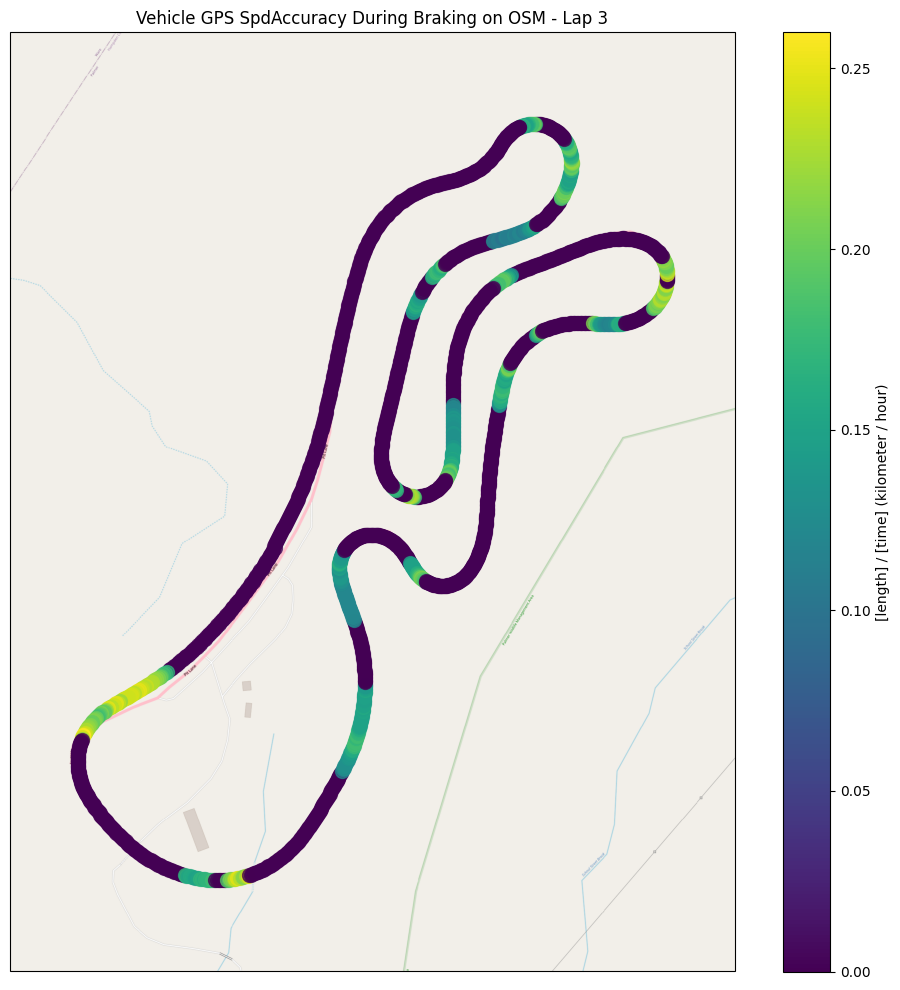

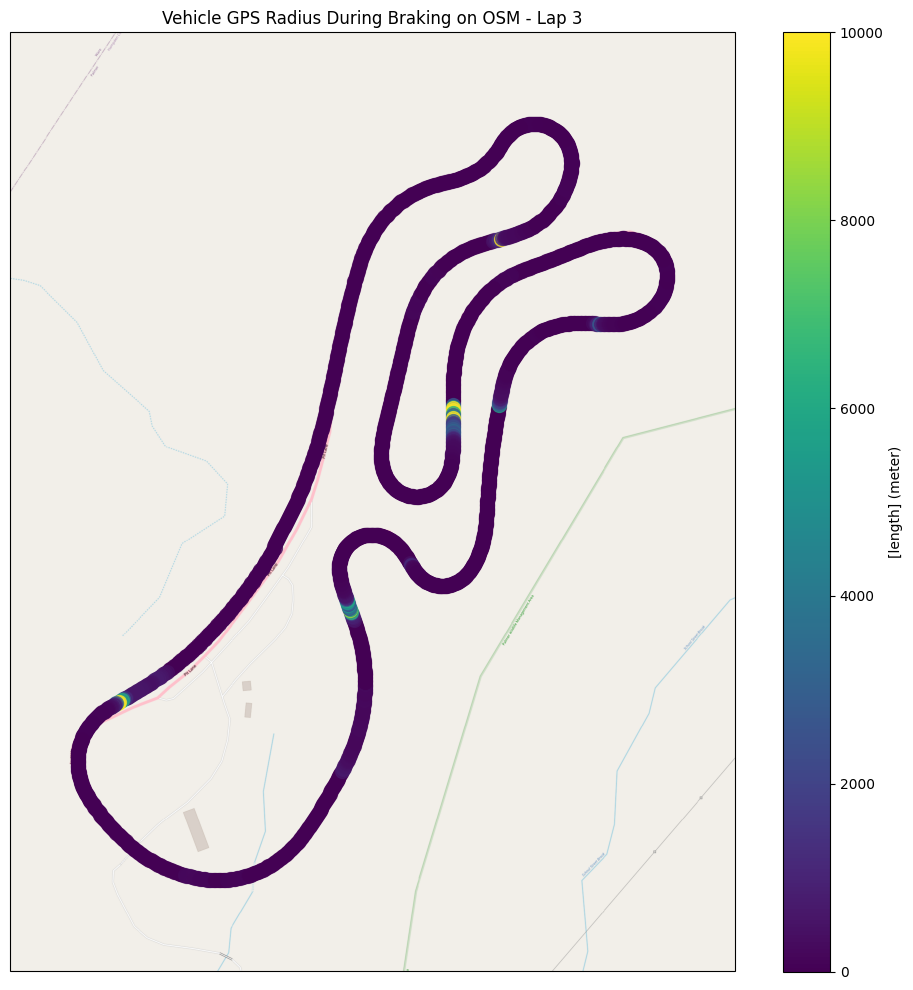

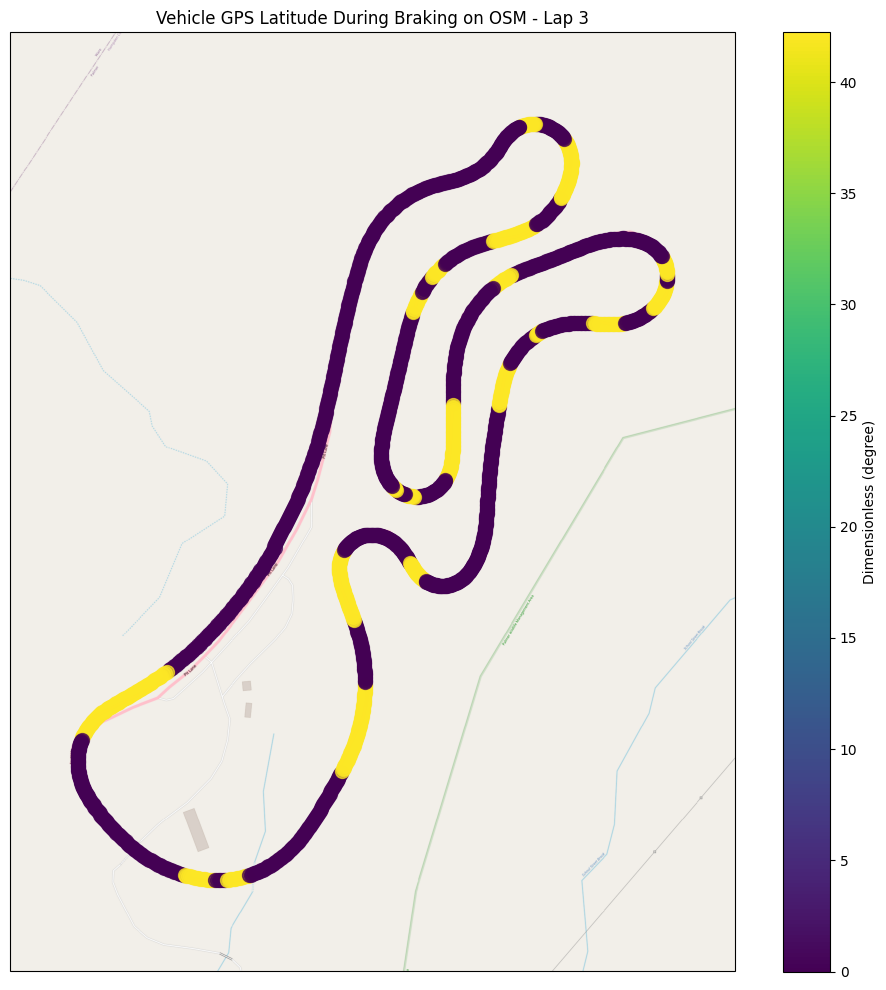

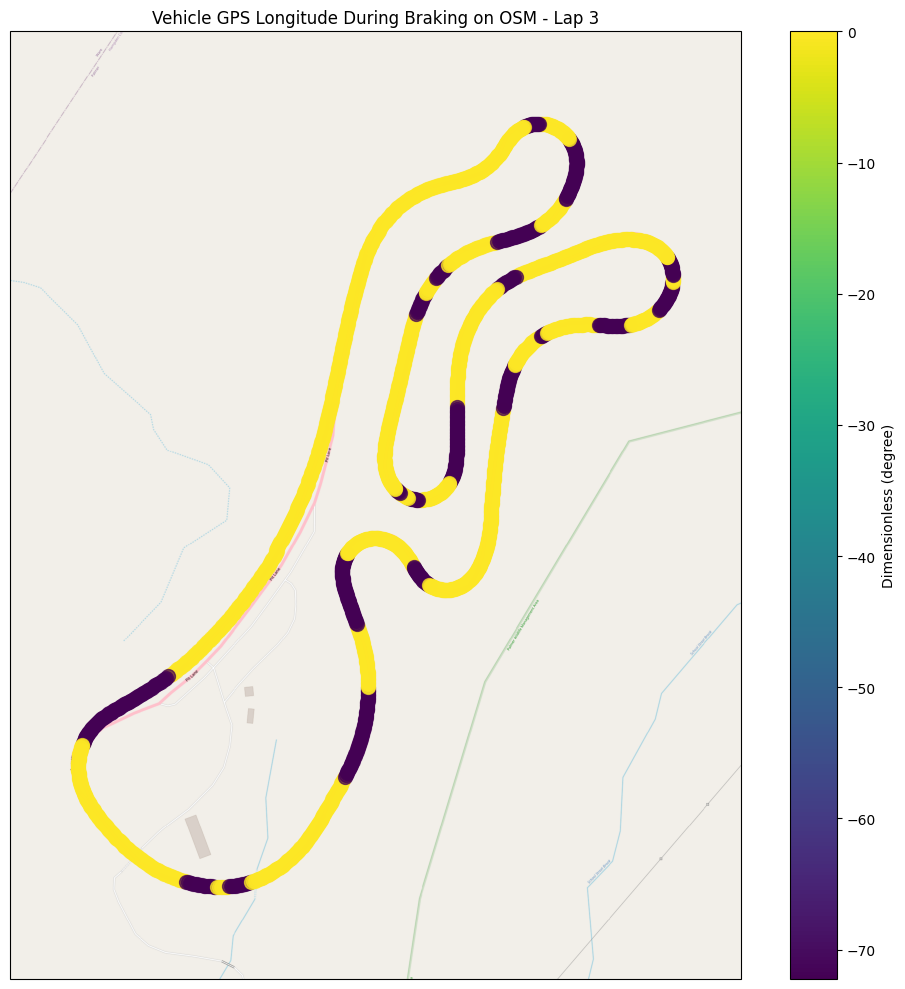

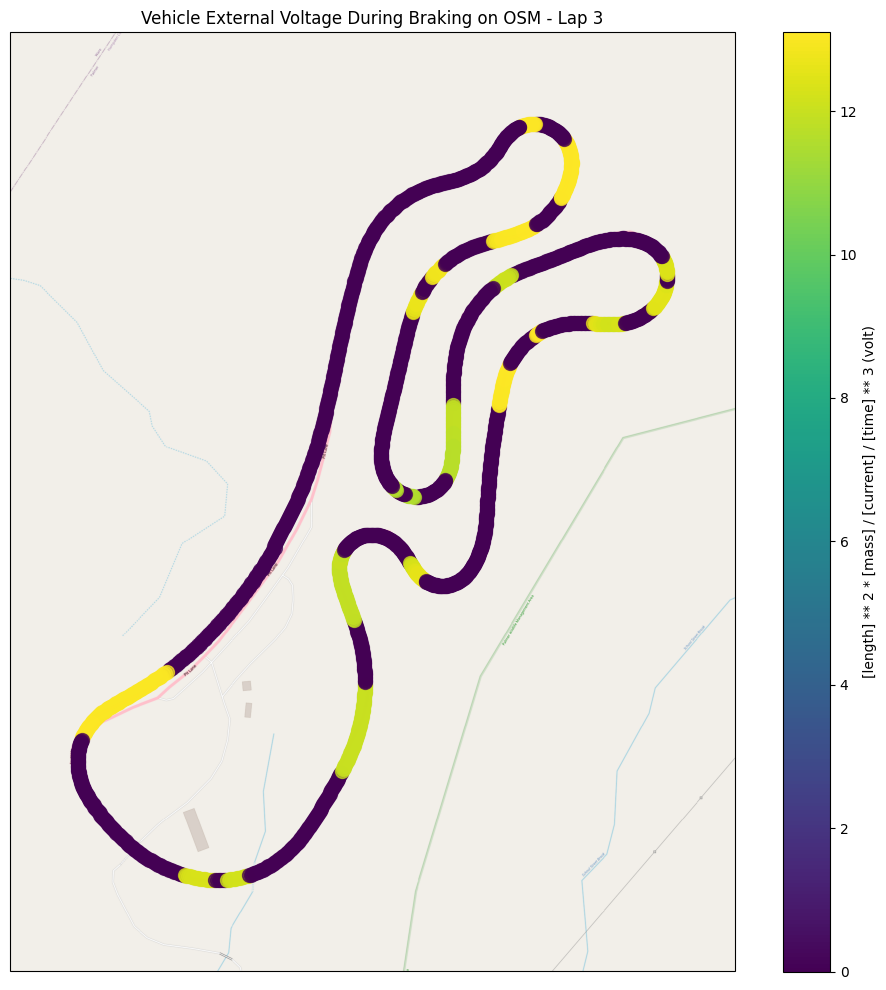

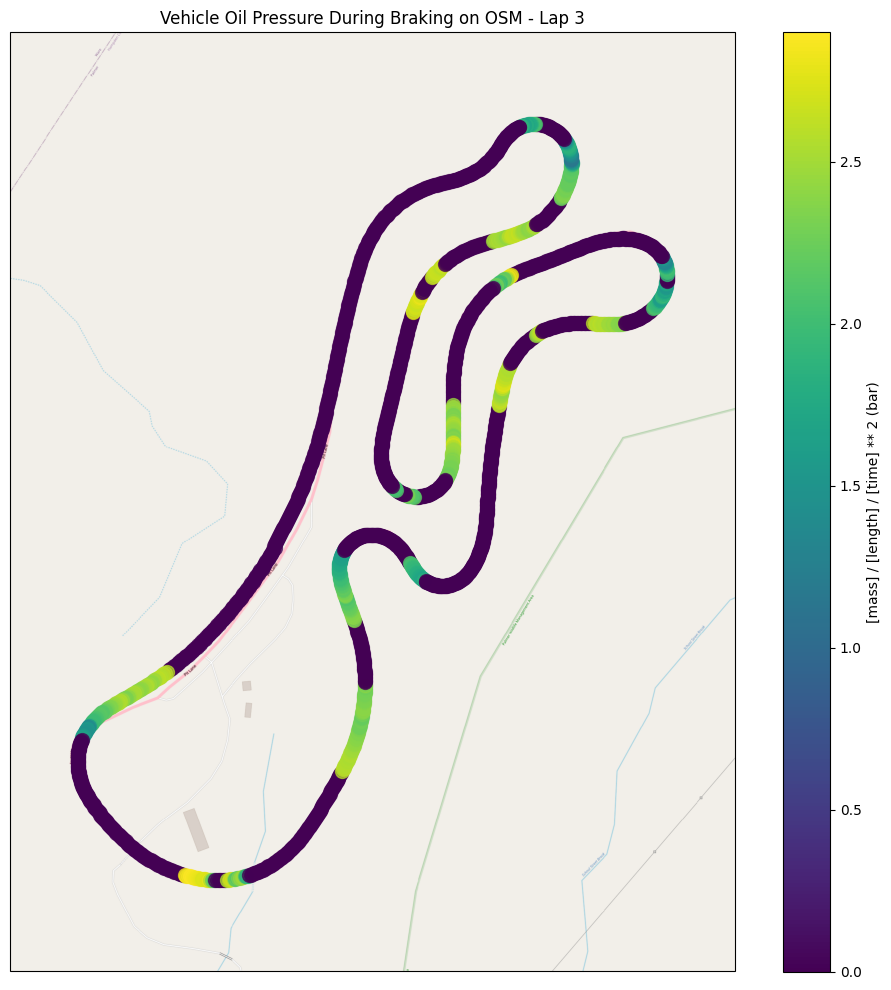

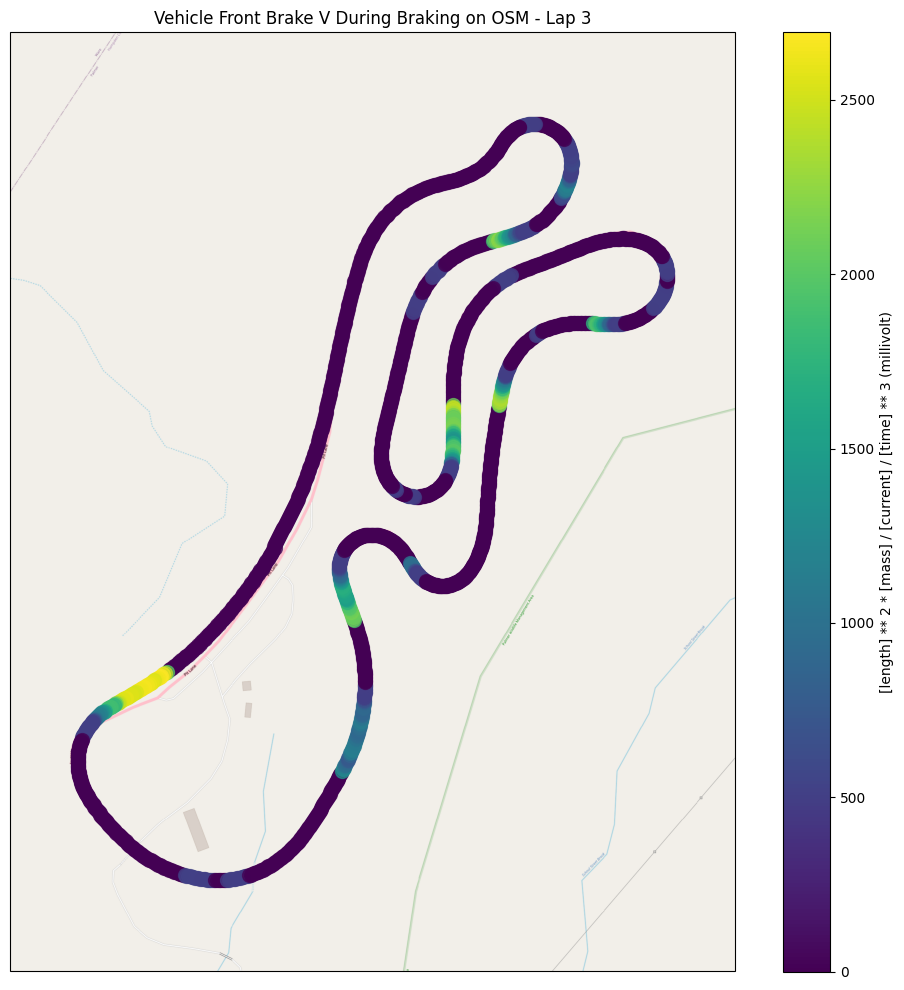

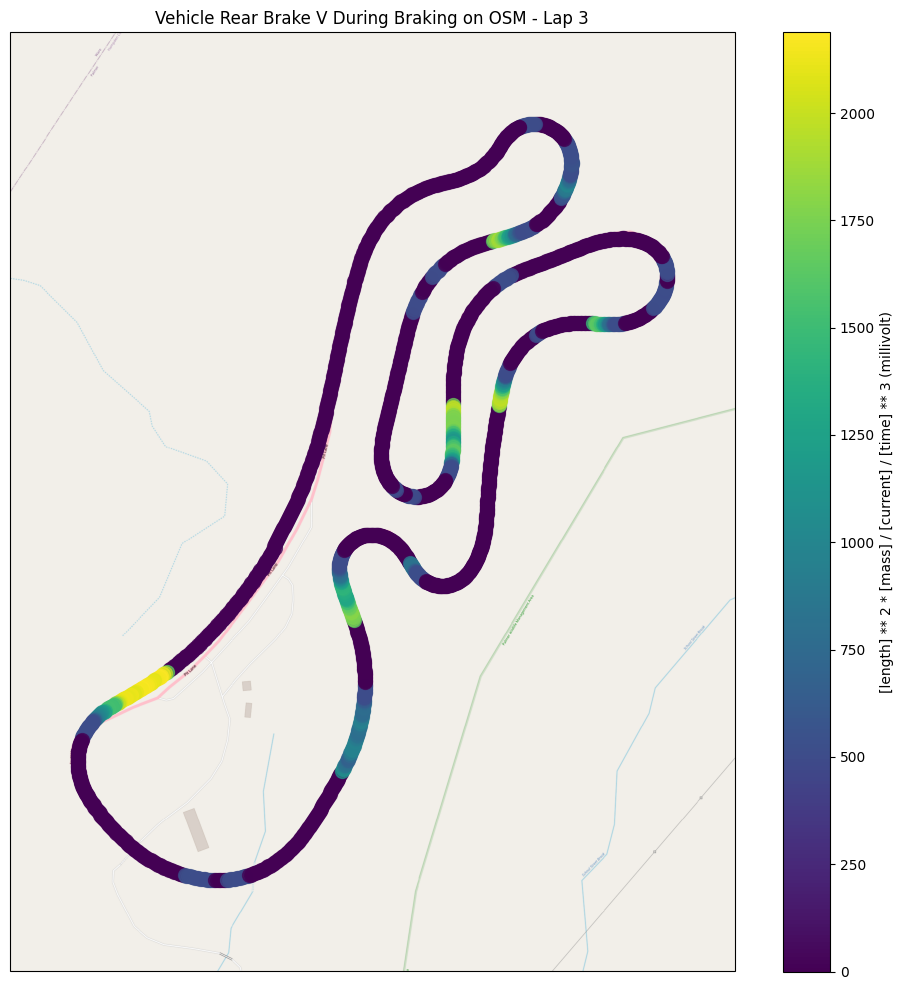

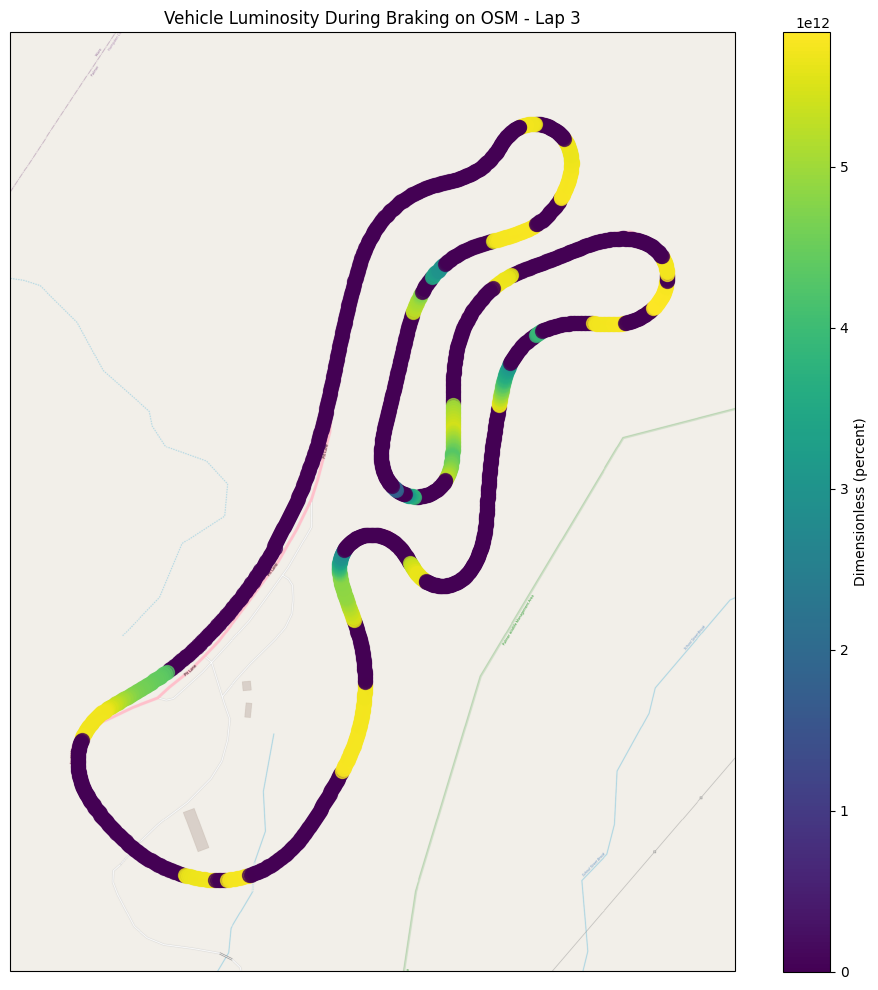

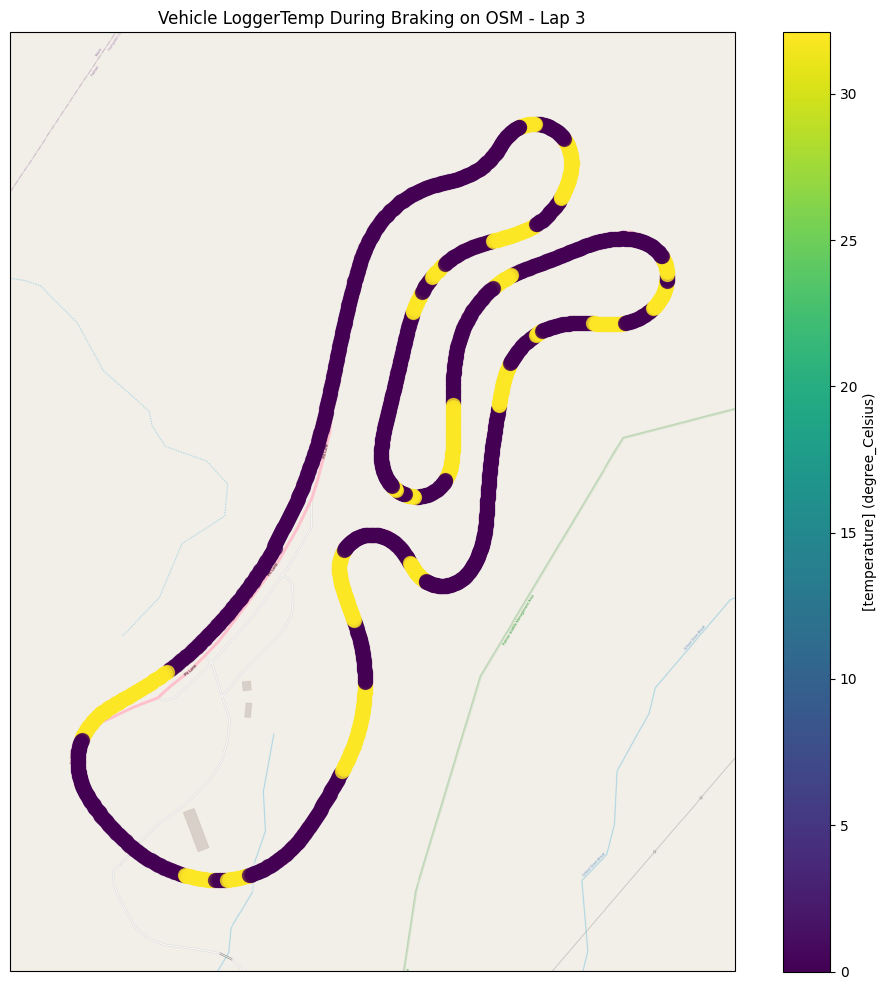

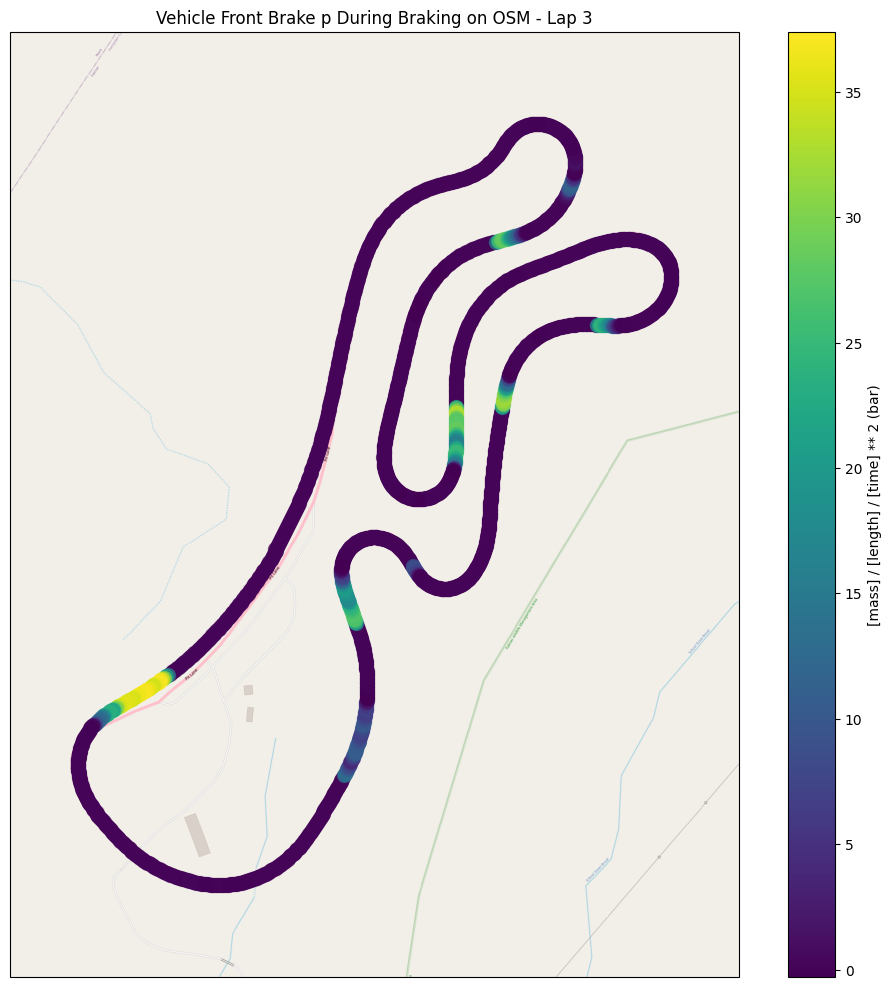

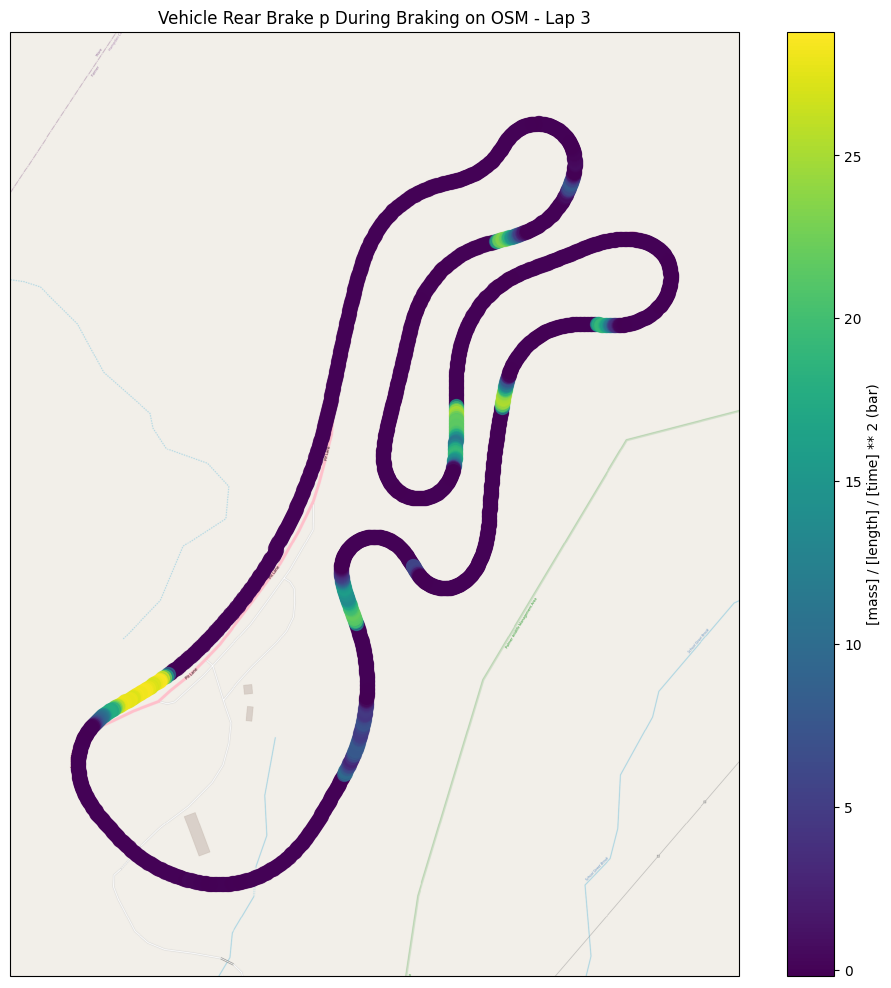

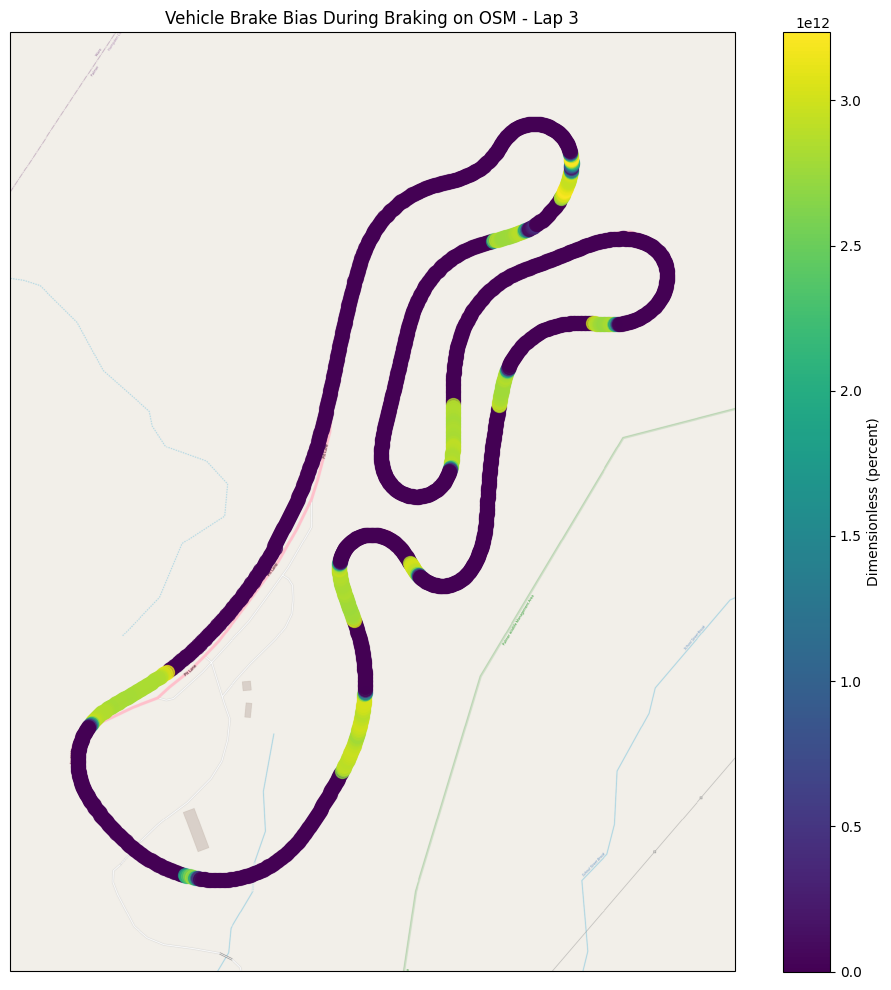

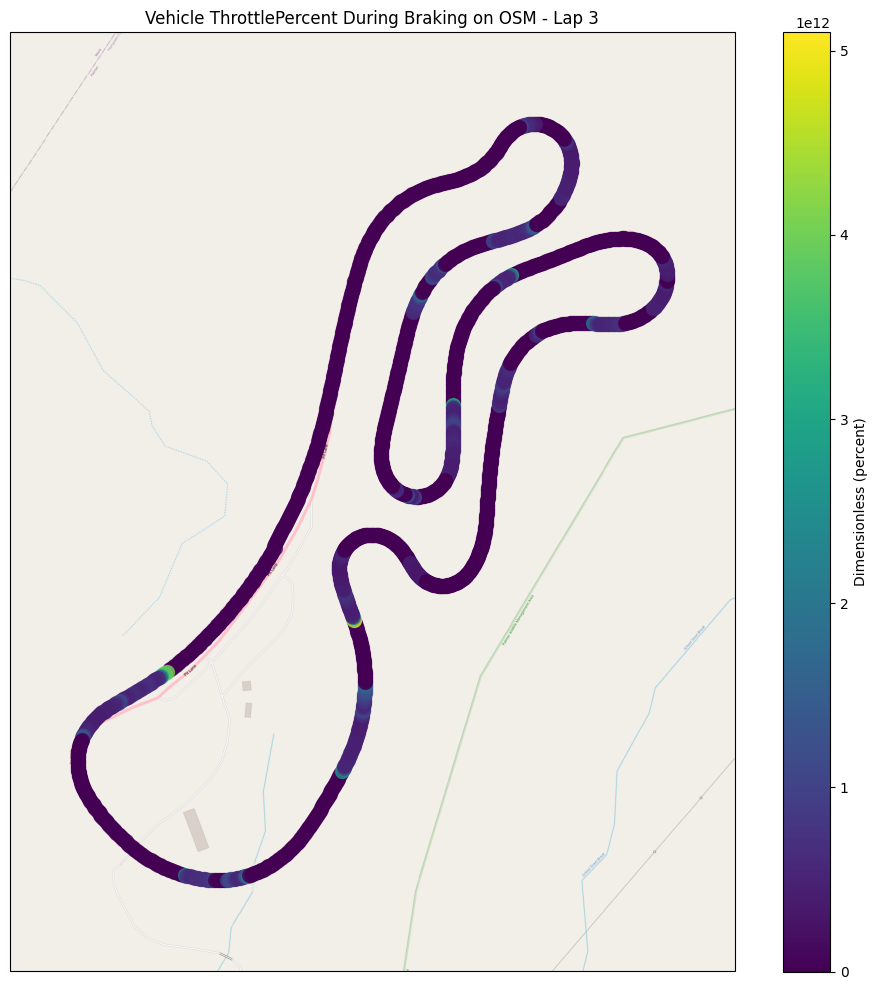

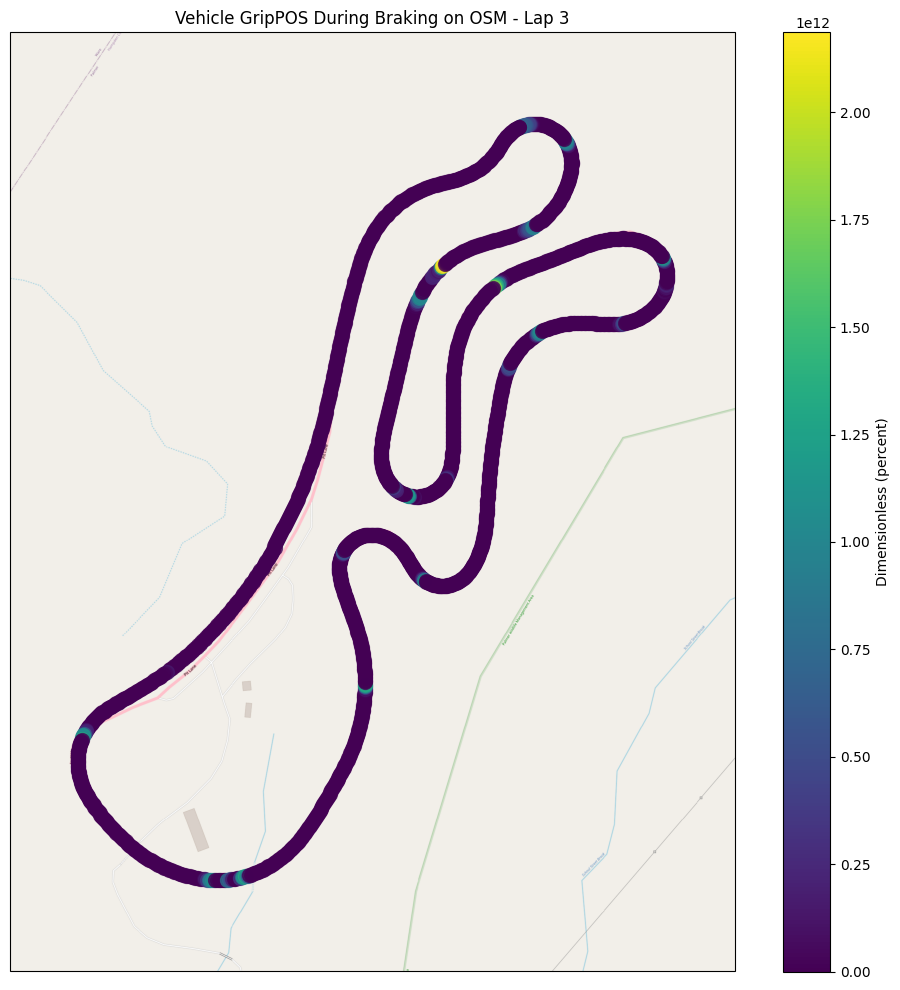

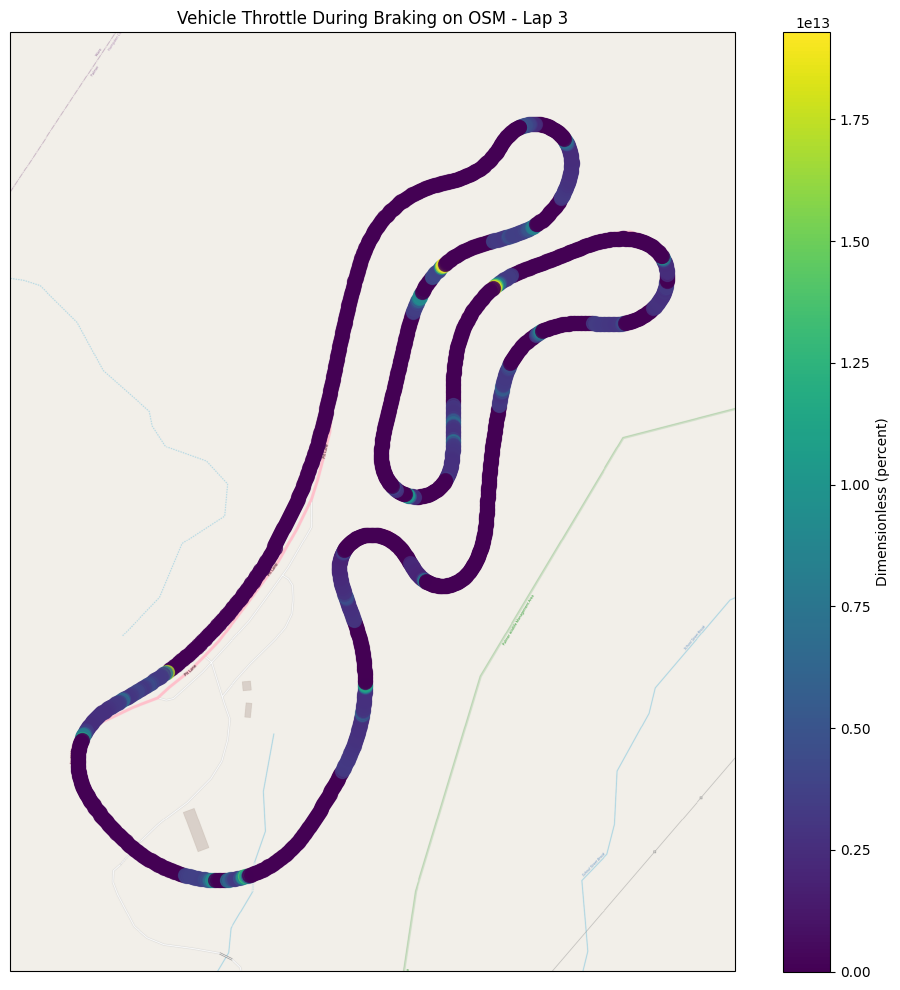

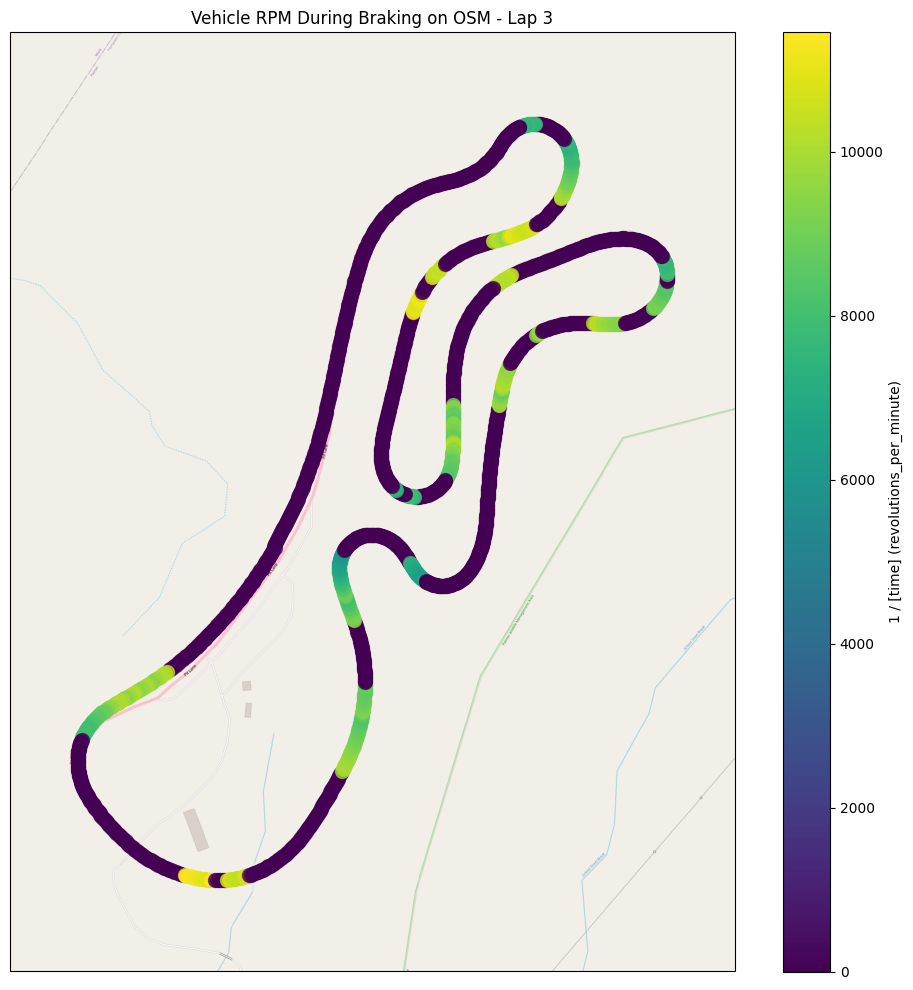

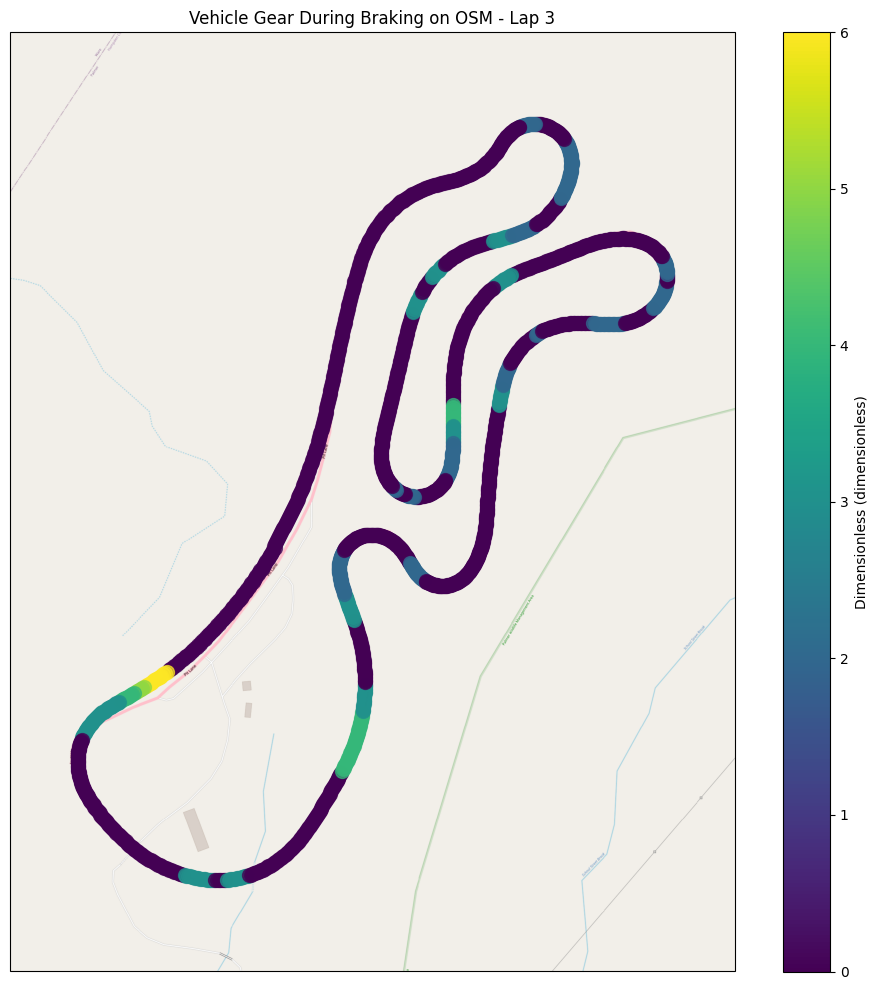

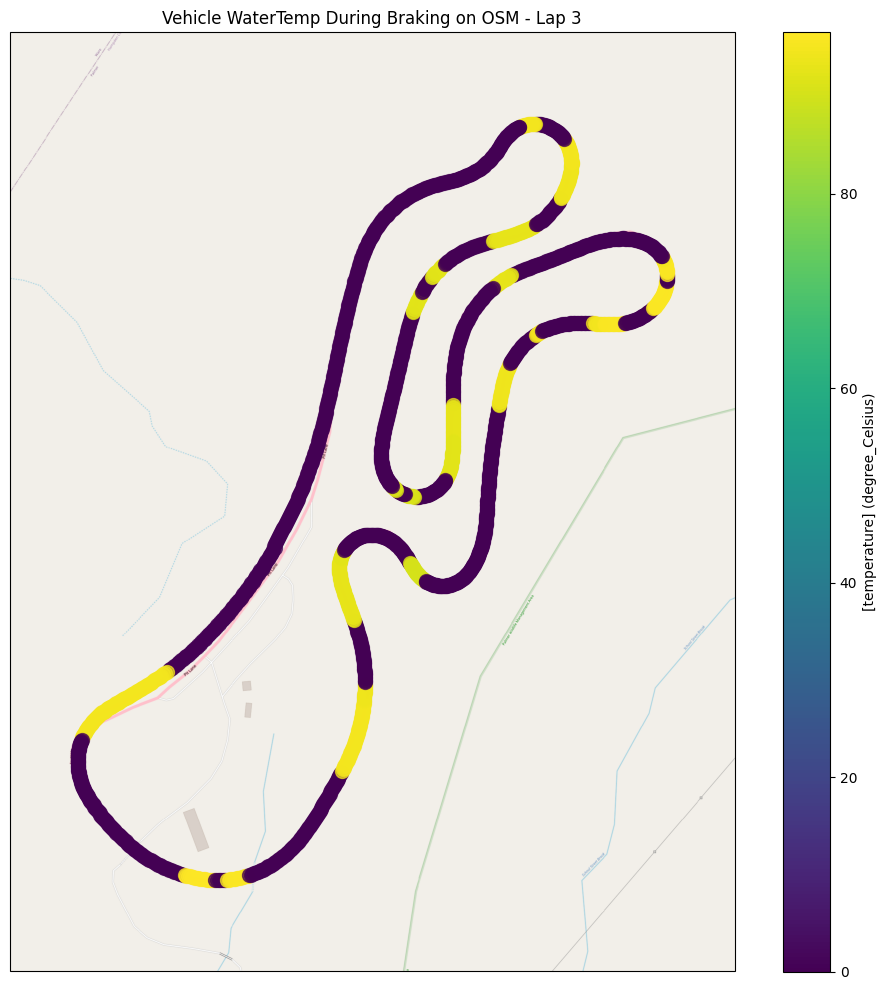

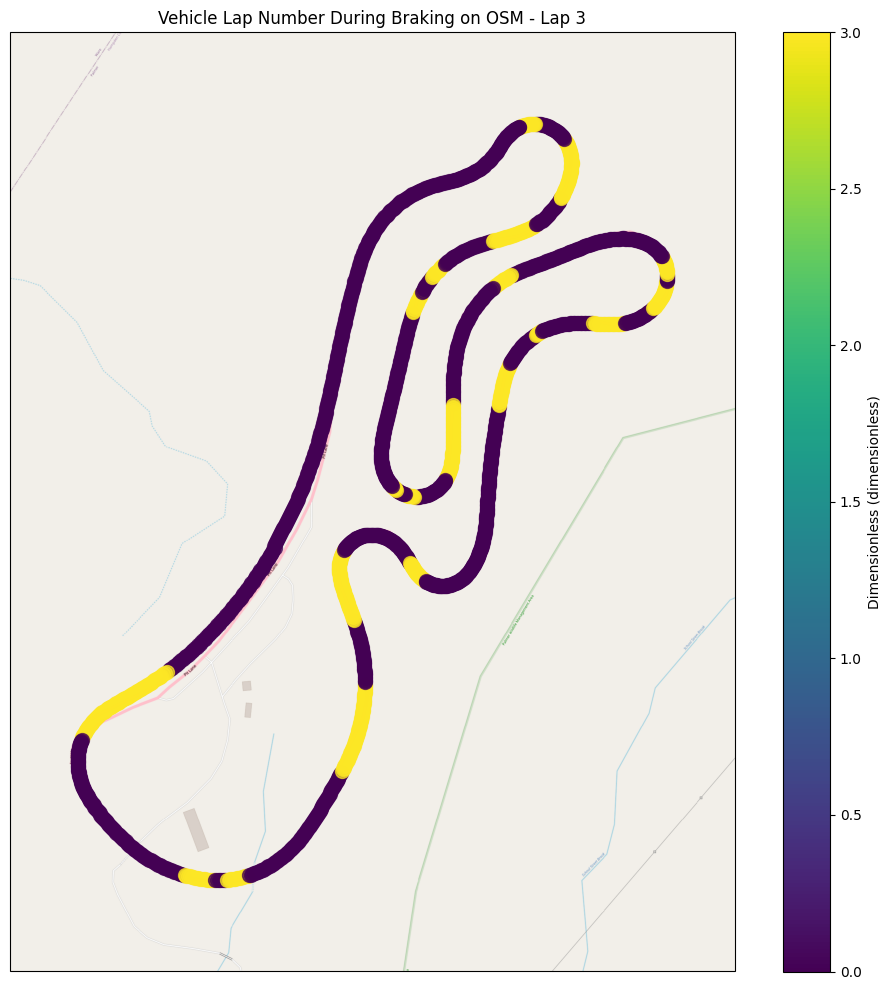

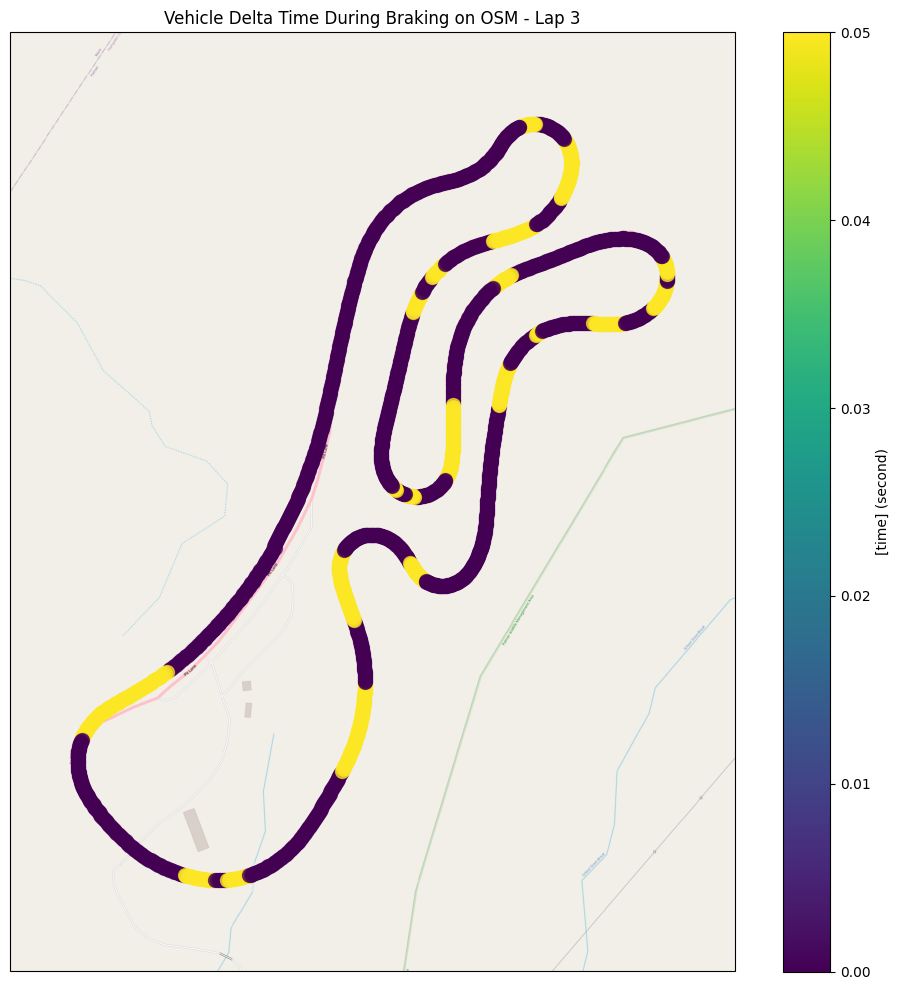

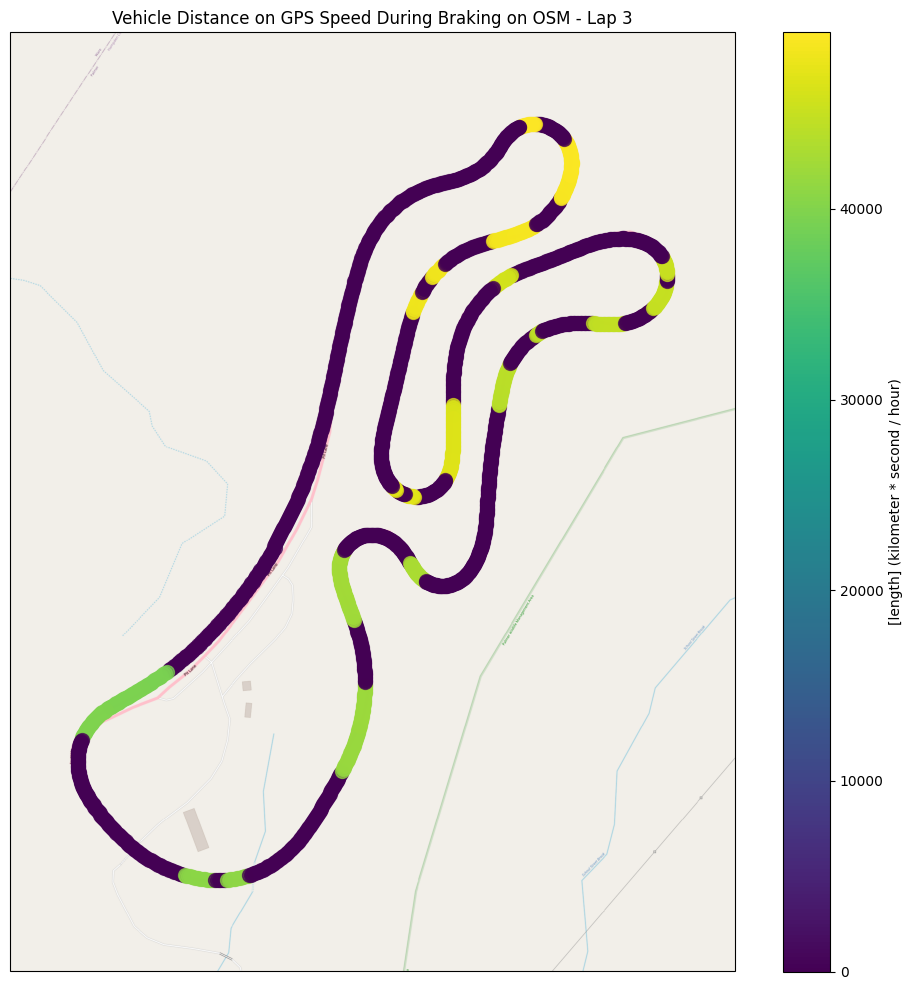

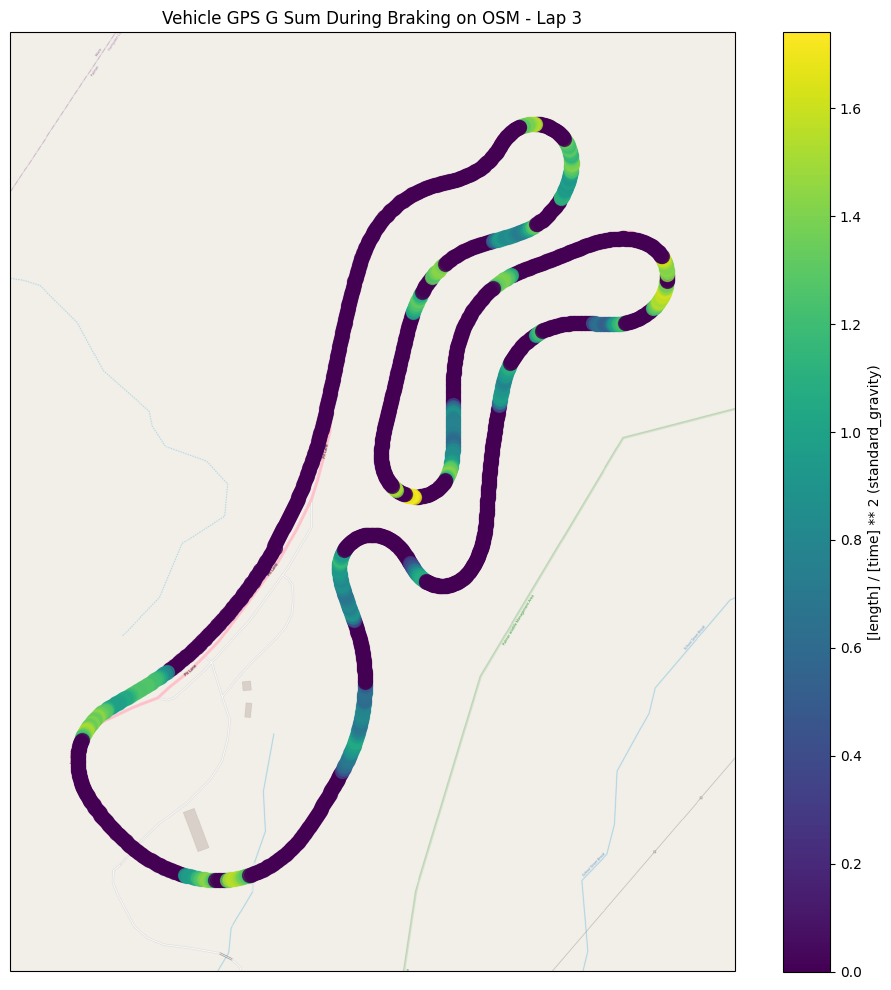

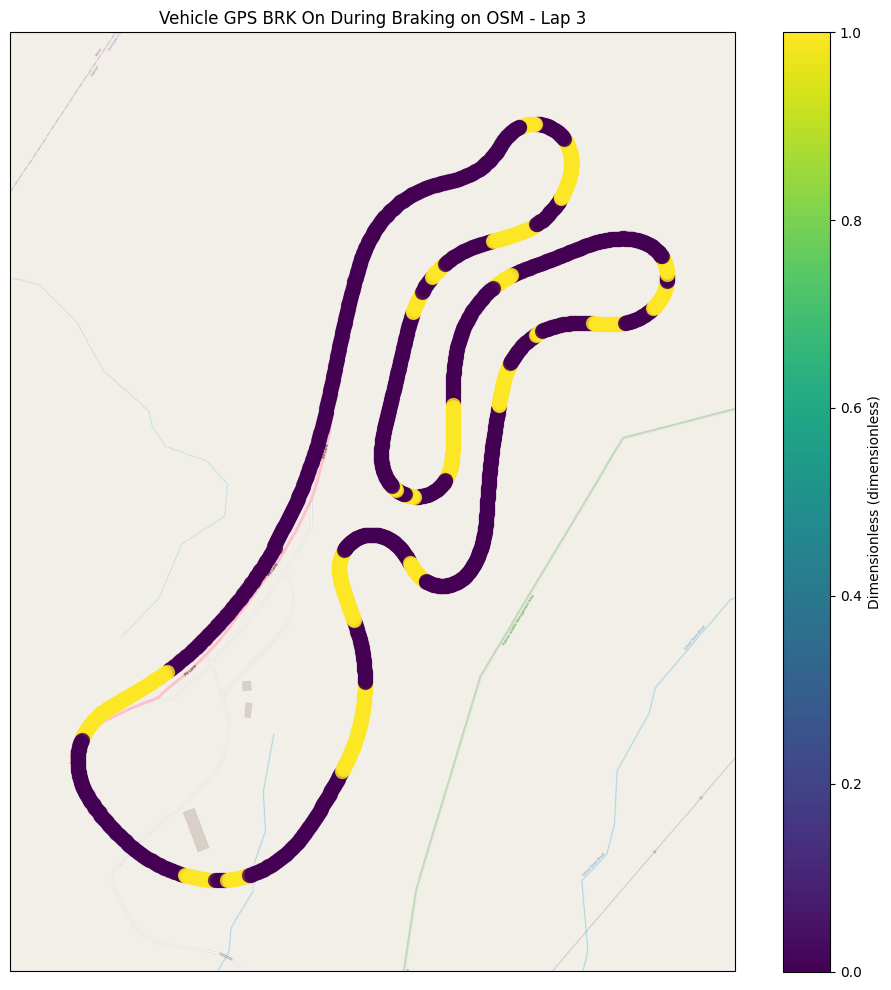

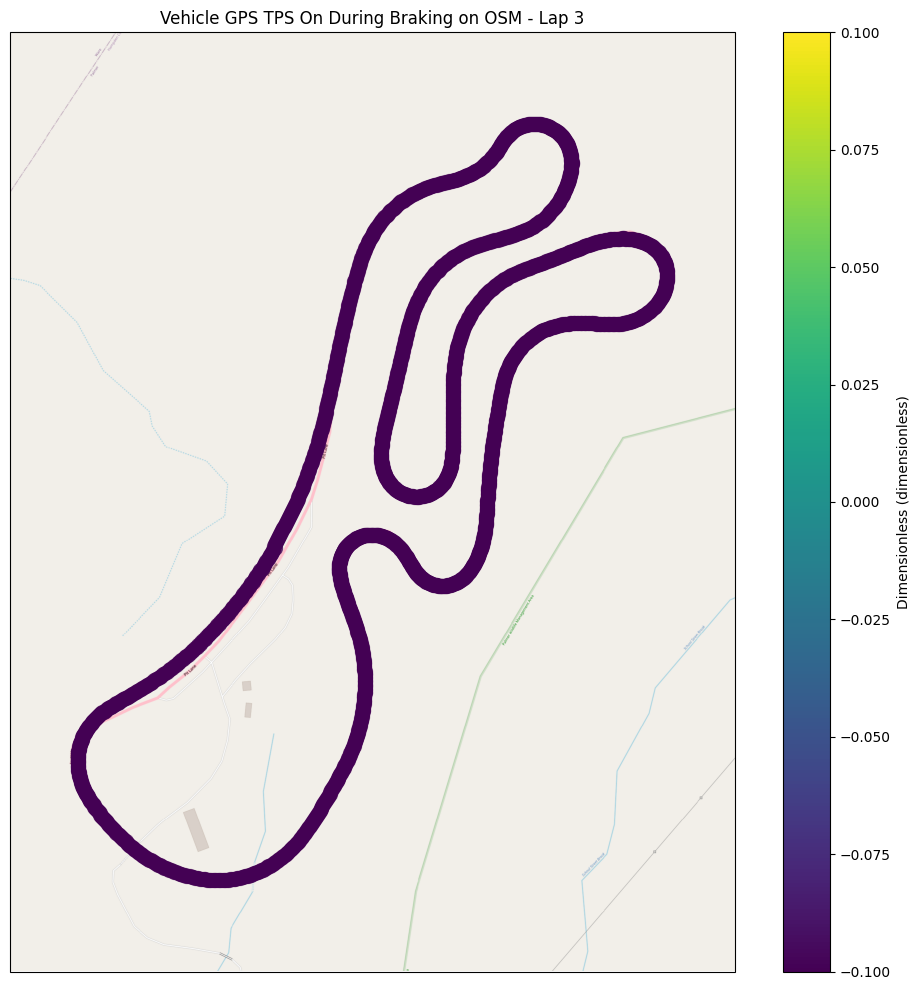

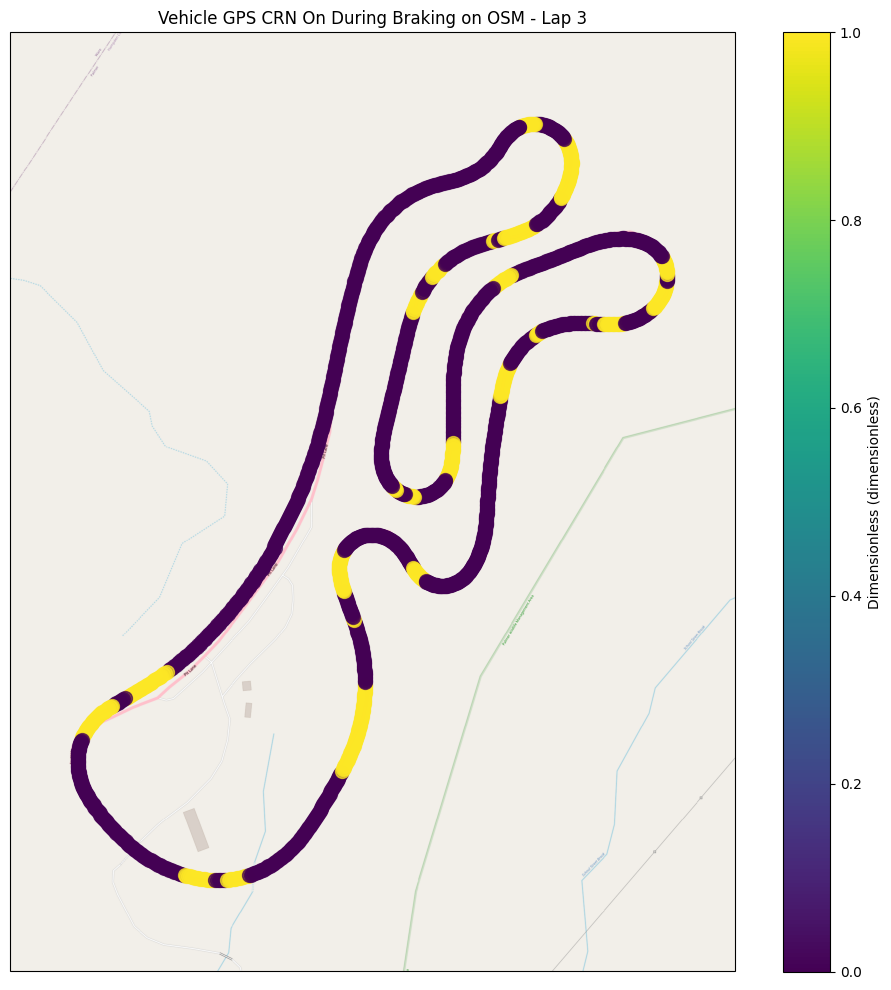

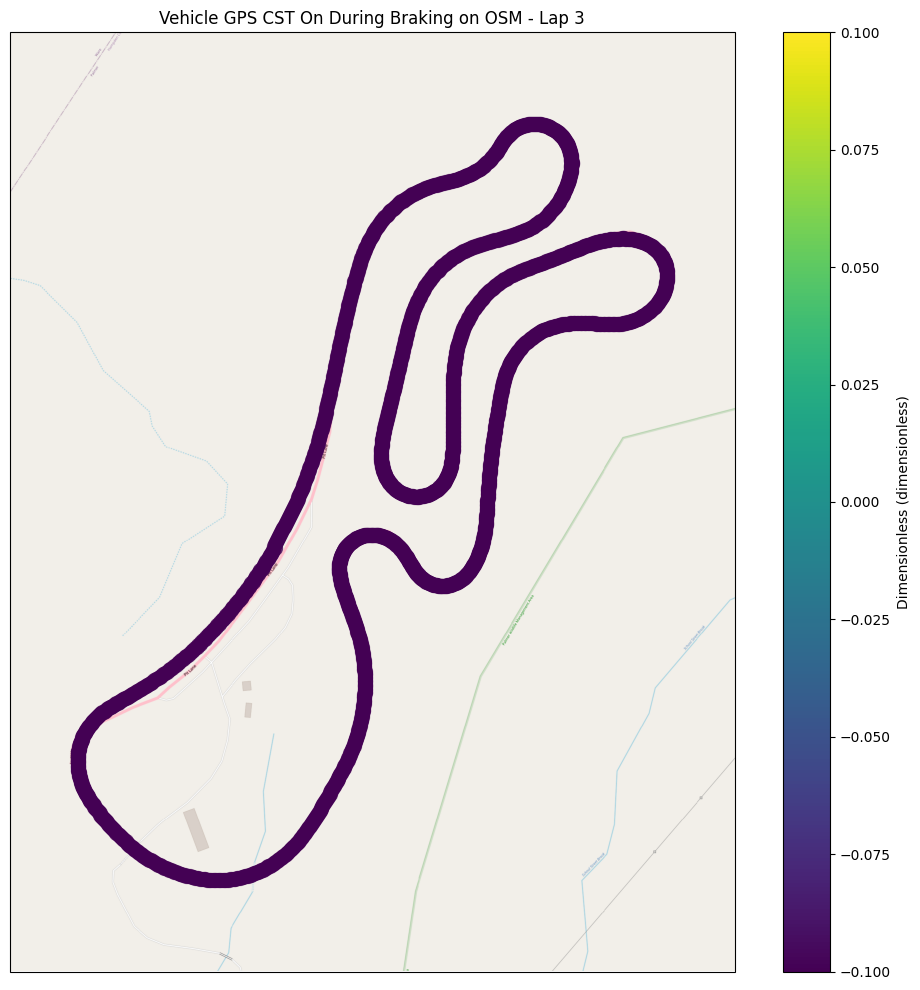

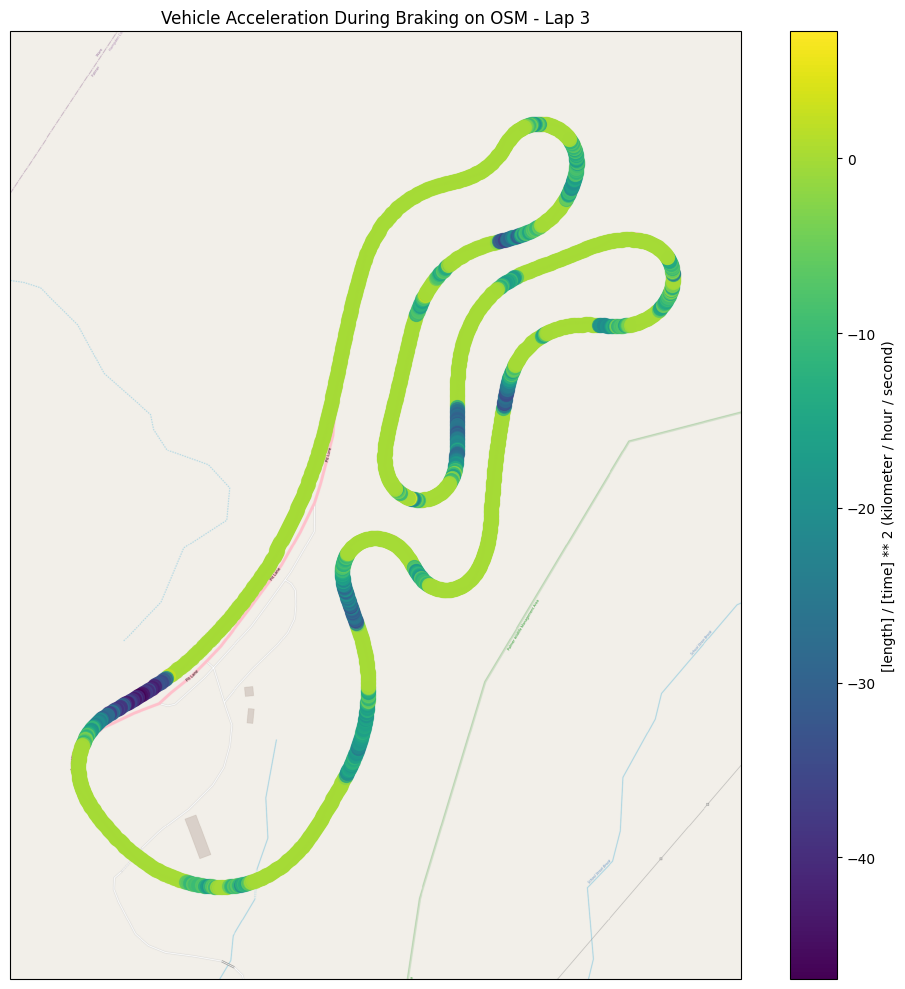

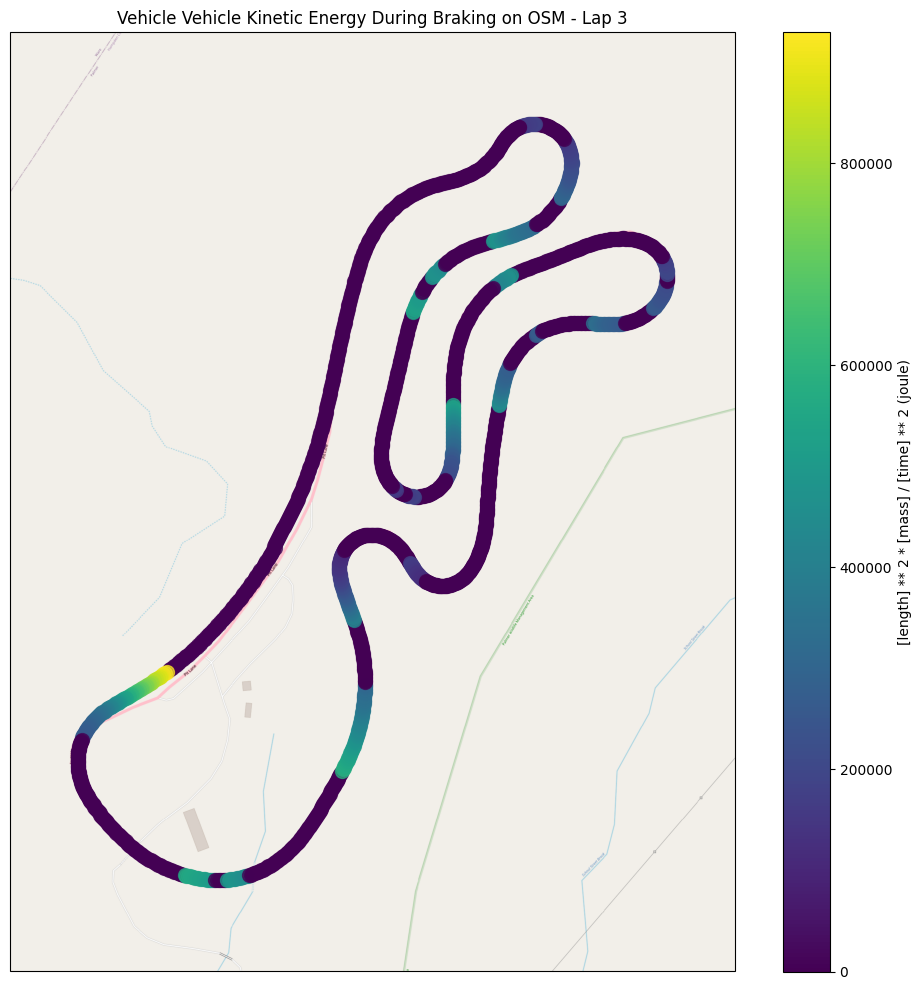

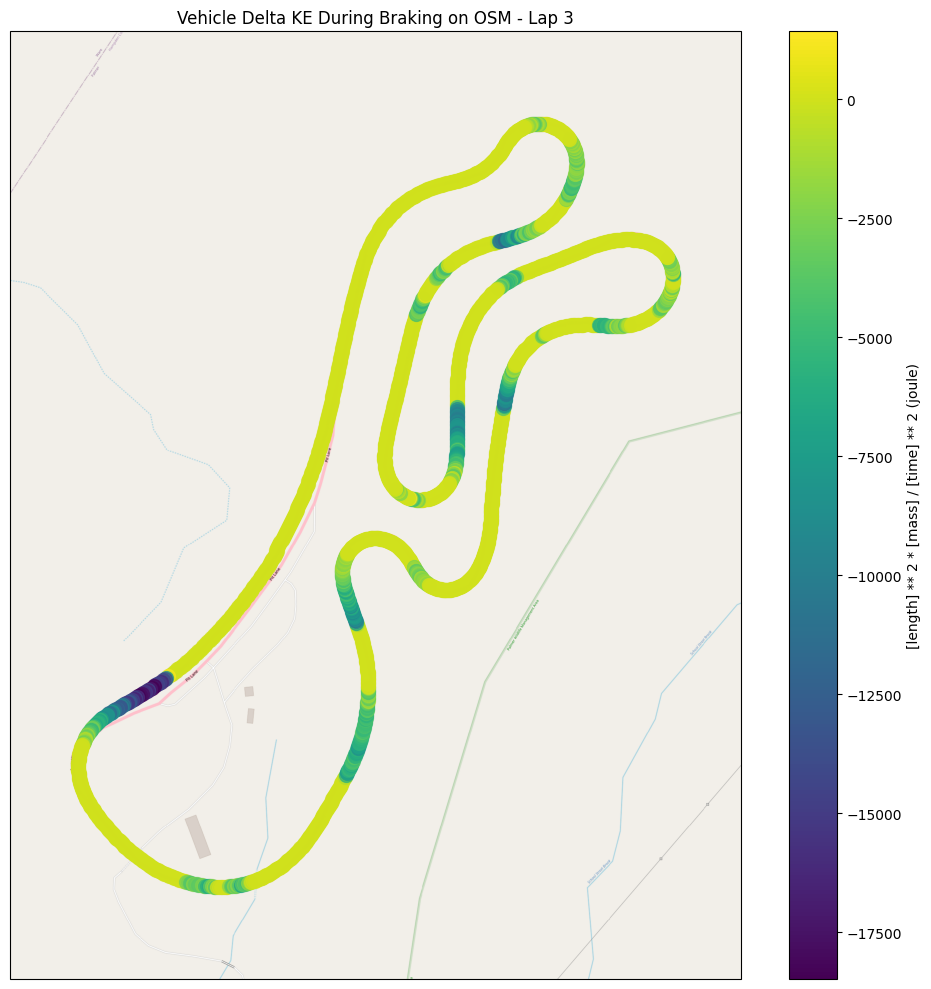

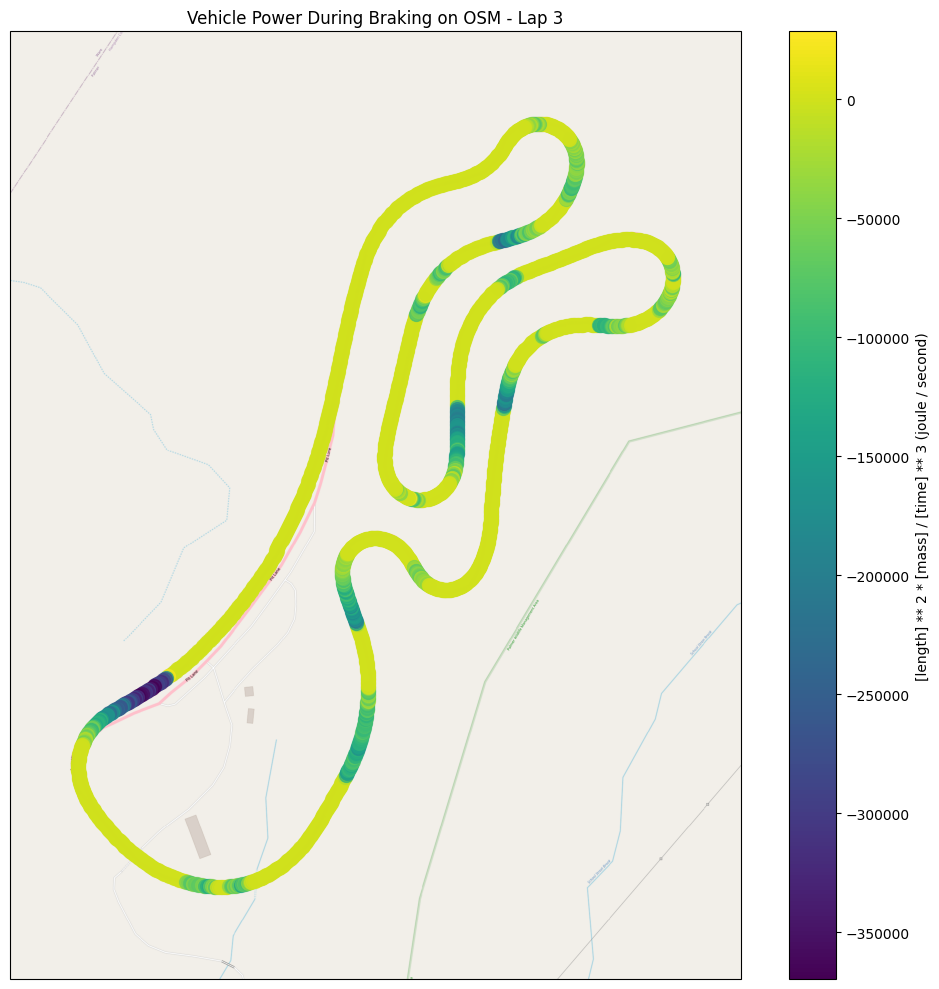

In [17]:
def plot_all_columns_during_braking(
        df: pd.DataFrame,
        data_filepath: str,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    for data_column in df.columns:
        data_during_braking = columns_during_state(
            df=df,
            data_columns=data_column,
            state_columns=COL_BRAKING_ON,
            append_to_column_name='During Braking',
            fill_with_zeros=True,
        )
        # data_during_braking = pd.Series(data=(
        #     df.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', COL_BRAKING_ON]].apply(
        #     lambda x: (x['Delta KE'] * x[COL_BRAKING_ON]).cumsum())), name='Energy Recuperation During Braking').reset_index(level=0, drop=True).pint.to_base_units()

        data_units = data_during_braking.pint.units
        plot_map(
            df=df,
            data_to_plot=data_during_braking.pint.to_base_units(),
            data_units=data_during_braking.pint.units,
            lap_num=3,
            colorbar_label=f'{str(df[data_column].pint.dimensionality).capitalize()} ({data_units})',
            data_filepath=data_filepath,
            save_plots=save_plots,
            show_plots=True,
        )

plot_all_columns_during_braking(RACE_DATA_DF, RACE_DATA_FILEPATH)

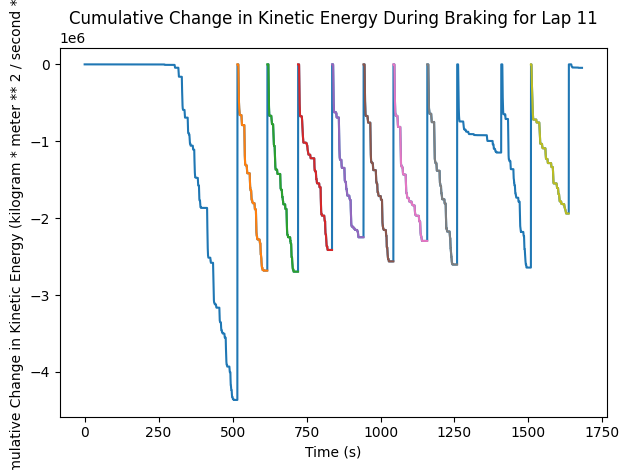

In [18]:
cumulative_ke_change = pd.Series(data=RACE_DATA_DF.groupby(COL_LAP_NUM)['Delta KE'].apply(lambda x: x.cumsum()))

cumulative_ke_change_during_coast = pd.Series(data=(
    RACE_DATA_DF.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', 'GPS CST On']].apply(
        lambda x: (x['Delta KE'] * x['GPS CST On']).cumsum())))

abs_cumulative_ke_change_during_coast = pd.Series(data=(
    RACE_DATA_DF.groupby(COL_LAP_NUM)[[COL_LAP_NUM, 'Delta KE', COL_BRAKING_ON]].apply(
        lambda x: (x['Delta KE'] * x[COL_BRAKING_ON]).cumsum())))

# cumulative_ke_change_during_coast = pd.Series(data=(RACE_DATA_DF * RACE_DATA_DF['GPS CST On']).groupby(COL_LAP_NUM)['Delta KE'].apply(lambda x: x.cumsum()))
# cumulative_ke_change_during_coast = pd.Series(data=strip_df_of_units(RACE_DATA_DF.groupby(COL_LAP_NUM)['Delta KE']).cumsum(), dtype=f'pint[{UNITS["Delta KE"]}]')

plt.title(f'Cumulative Change in Kinetic Energy by Lap')
plot_data(RACE_DATA_DF[COL_TIME], f'Time ({UNITS[COL_TIME]})', abs_cumulative_ke_change_during_coast.pint.to_base_units(), f'Cumulative Change in Kinetic Energy ({abs_cumulative_ke_change_during_coast.pint.to_base_units().pint.units})')

lap_indices = get_lap_indices(RACE_DATA_DF)

for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
    start_lap_index, end_lap_index = lap_indices[lap_num]

    valid_lap_times = slice_into_df(RACE_DATA_DF[COL_TIME], start_lap_index, end_lap_index)
    lap_cum_KE = slice_into_df(abs_cumulative_ke_change_during_coast, start_lap_index, end_lap_index)

    plt.title(f'Cumulative Change in Kinetic Energy During Braking for Lap {lap_num}')
    plot_data(
        valid_lap_times,
        f'Time ({UNITS[COL_TIME]})',
        lap_cum_KE.pint.to_base_units(),
        f'Cumulative Change in Kinetic Energy ({lap_cum_KE.pint.to_base_units().pint.units})'
    )

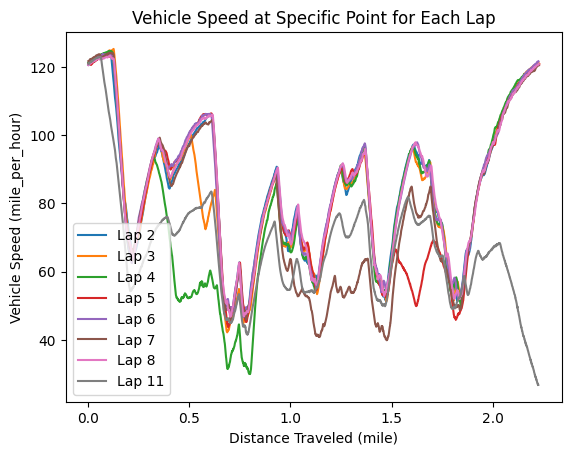

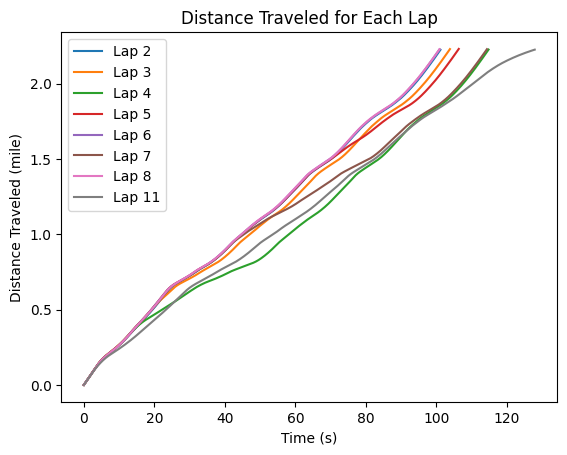

In [19]:
#### VEHICLE SPEED FOR EACH LAP VS. TIME ####
# lap_indices = get_lap_indices(RACE_DATA_DF)

# for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
#     start_lap_index, end_lap_index = lap_indices[lap_num]

#     valid_lap_times = slice_into_df(RACE_DATA_DF['Time'], start_lap_index, end_lap_index)
#     zeroed_lap_times = np.linspace(0, valid_lap_times.iloc[-1] - valid_lap_times.iloc[0], len(valid_lap_times))
#     valid_car_speeds = slice_into_df(RACE_DATA_DF['GPS Speed'], start_lap_index, end_lap_index)
#     plt.plot(zeroed_lap_times, valid_car_speeds.pint.to('mph'), label=f'Lap {lap_num}')
#     # plot_data(zeroed_lap_times, f'Time ({UNITS["Time"]})', valid_car_speeds.pint.to('mph'), f'Vehicle Speed ({valid_car_speeds.pint.to("mph").pint.units})')

# plt.xlabel(f'Time ({UNITS["Time"]})')
# plt.ylabel(f'Vehicle Speed ({valid_car_speeds.pint.to("mph").pint.units})')
# plt.legend()
# plt.title(f'Vehicle Speed for Each Lap')
# plt.show()
#############################################


#### VEHICLE SPEED FOR EACH LAP VS. DISTANCE ####
lap_indices = get_lap_indices(RACE_DATA_DF)

for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
    start_lap_index, end_lap_index = lap_indices[lap_num]

    valid_car_distance = slice_into_df(RACE_DATA_DF['Distance on GPS Speed'], start_lap_index, end_lap_index)
    reset_distances = valid_car_distance - valid_car_distance.iloc[0]
    valid_car_speeds = slice_into_df(RACE_DATA_DF['GPS Speed'], start_lap_index, end_lap_index)
    plt.plot(reset_distances.pint.to('miles'), valid_car_speeds.pint.to('mph'), label=f'Lap {lap_num}')

plt.xlabel(f'Distance Traveled ({reset_distances.pint.to("miles").pint.units})')
plt.ylabel(f'Vehicle Speed ({valid_car_speeds.pint.to("mph").pint.units})')
plt.legend()
plt.title(f'Vehicle Speed at Specific Point for Each Lap')
save_plot(data_file=RACE_DATA_FILEPATH)
plt.show()
#################################################


lap_indices = get_lap_indices(RACE_DATA_DF)

for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
    start_lap_index, end_lap_index = lap_indices[lap_num]

    valid_lap_times = slice_into_df(RACE_DATA_DF['Time'], start_lap_index, end_lap_index)
    zeroed_lap_times = np.linspace(0, valid_lap_times.iloc[-1] - valid_lap_times.iloc[0], len(valid_lap_times))
    valid_car_distance = slice_into_df(RACE_DATA_DF['Distance on GPS Speed'], start_lap_index, end_lap_index)
    reset_distances = valid_car_distance - valid_car_distance.iloc[0]
    plt.plot(zeroed_lap_times, reset_distances.pint.to('miles'), label=f'Lap {lap_num}')
    # plot_data(zeroed_lap_times, f'Time ({UNITS["Time"]})', reset_distances.pint.to('miles'), f'Vehicle Speed ({valid_car_distance.pint.to("miles").pint.units})')

plt.legend()
plt.xlabel(f'Time ({UNITS["Time"]})')
plt.ylabel(f'Distance Traveled ({reset_distances.pint.to("miles").pint.units})')
plt.title(f'Distance Traveled for Each Lap')
plt.show()

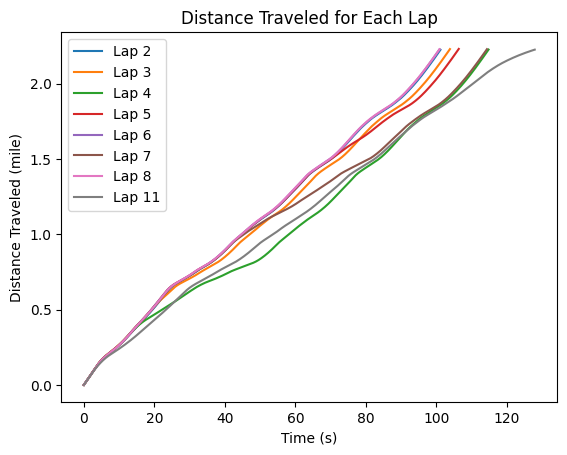

In [20]:
lap_indices = get_lap_indices(RACE_DATA_DF)

for lap_num in get_usable_lap_nums(RACE_DATA_FILEPATH):
    start_lap_index, end_lap_index = lap_indices[lap_num]

    valid_lap_times = slice_into_df(RACE_DATA_DF['Time'], start_lap_index, end_lap_index)
    zeroed_lap_times = np.linspace(0, valid_lap_times.iloc[-1] - valid_lap_times.iloc[0], len(valid_lap_times))
    valid_car_distance = slice_into_df(RACE_DATA_DF['Distance on GPS Speed'], start_lap_index, end_lap_index)
    reset_distances = valid_car_distance - valid_car_distance.iloc[0]
    plt.plot(zeroed_lap_times, reset_distances.pint.to('miles'), label=f'Lap {lap_num}')
    # plot_data(zeroed_lap_times, f'Time ({UNITS["Time"]})', reset_distances.pint.to('miles'), f'Vehicle Speed ({valid_car_distance.pint.to("miles").pint.units})')

plt.legend()
plt.xlabel(f'Time ({UNITS[COL_TIME]})')
plt.ylabel(f'Distance Traveled ({reset_distances.pint.to("miles").pint.units})')
plt.title(f'Distance Traveled for Each Lap')
plt.show()

## Maps

In [21]:
from race_analysis.map_data import plot_map_every_lap

### Plot GPS Speed

In [22]:
def plot_GPS_Speed(
        df: pd.DataFrame,
        data_filepath: Optional[str] = None,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_name = 'GPS Speed'
    plot_units = 'mph'
    colorbar_label = f'Velocity [{plot_units}]'
    data_filepath = data_filepath if data_filepath is not None else RACE_DATA_FILEPATH

    plot_map_every_lap(
        df=df,
        data_to_plot=df[data_name],
        data_units=plot_units,
        colorbar_label=colorbar_label,
        data_filepath=data_filepath,
        save_plots=save_plots,
        show_plots=show_plots,
    )

    if save_plots:
        save_plot(data_filepath)

# plot_GPS_Speed(df=RACE_DATA_DF)

In [23]:
def plot_GPS_G_Sum(
        df: pd.DataFrame,
        data_filepath: Optional[str] = None,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_name = 'GPS G Sum'
    data_filepath = data_filepath if data_filepath is not None else RACE_DATA_FILEPATH

    plot_map_every_lap(
        df=df,
        data_to_plot=df[data_name],
        data_units=(u.m/(u.s**2)),
        colorbar_label='Acceleration (m/s^2)',
        data_filepath=data_filepath,
        save_plots=save_plots,
        show_plots=show_plots,
    )
    save_plot(data_filepath)

# plot_GPS_G_Sum(df=RACE_DATA_DF)

In [24]:
def plot_Acceleration(
        df: pd.DataFrame,
        data_filepath: Optional[str] = None,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_name = 'Acceleration'
    colorbar_label = 'Acceleration [m/(s^2)]'
    data_filepath = data_filepath if data_filepath is not None else RACE_DATA_FILEPATH

    plot_map_every_lap(
        df=df,
        data_to_plot=df[data_name],
        data_units=(u.m/(u.s**2)),
        colorbar_label=colorbar_label,
        data_filepath=data_filepath,
        save_plots=save_plots,
        show_plots=show_plots,
    )

# plot_Acceleration(df=RACE_DATA_DF)

In [25]:
def plot_column_for_all_tracks(
        column_name: str,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_files = get_data_files()

    for data_filepath in data_files:
        UNITS: dict[str, str] = {}
        race_data_df = load_race(race_data_filepath=data_filepath, units=UNITS)
        plot_map_every_lap(
            df=race_data_df,
            data_to_plot=race_data_df[column_name],
            colorbar_label=f'{race_data_df[column_name].pint.units}',
            data_filepath=data_filepath,
            save_plots=save_plots,
            show_plots=show_plots,
        )

# plot_column_for_all_tracks(df=RACE_DATA_DF, column_name='GPS Speed')

In [26]:
def plot_all_columns(
        df: pd.DataFrame,
        data_filepath: Optional[str] = None,
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_filepath = data_filepath if data_filepath is not None else RACE_DATA_FILEPATH

    for data_column in df.columns:
        try:
            print(f'\tPLOTTING COLUMN:      \t{data_column}')
            data_units = df[data_column].pint.units
            plot_map_every_lap(
                df=df,
                data_to_plot=df[data_column],
                data_units=data_units,
                colorbar_label=f'{str(df[data_column].pint.dimensionality).capitalize()} ({data_units})',
                data_filepath=data_filepath,
                save_plots=save_plots,
                show_plots=show_plots,
            )
        except Exception as error:
            print(f'\tFAILED TO PLOT COLUMN:\t{data_column}')
            print(f'\t{error}')

# plot_all_columns(df=RACE_DATA_DF)

In [27]:
def plot_all_columns_for_all_tracks(
        save_plots: bool = True,
        show_plots: bool = False,
    ) -> None:
    save_or_show_plot(save_plots=save_plots, show_plots=show_plots)

    data_files = get_data_files()

    for data_filepath in data_files:
        print(f'PLOTTING\t{get_filename(data_filepath)}')
        UNITS = {}
        race_data_df = load_race(race_data_filepath=data_filepath, units=UNITS)
        plot_all_columns(
            df=race_data_df,
            data_filepath=data_filepath,
            save_plots=save_plots,
            show_plots=show_plots,
        )

plot_all_columns_for_all_tracks()

PLOTTING	BETTER_20230831_143833_Blair Hosie_Rush SR 150_Palmer ACW_a_0045.csv
	PLOTTING COLUMN:      	Time
	PLOTTING COLUMN:      	GPS Speed
	PLOTTING COLUMN:      	GPS Nsat
	PLOTTING COLUMN:      	GPS LatAcc
	PLOTTING COLUMN:      	GPS LonAcc
	PLOTTING COLUMN:      	GPS Slope
	PLOTTING COLUMN:      	GPS Heading
	PLOTTING COLUMN:      	GPS Gyro
	PLOTTING COLUMN:      	GPS Altitude
	PLOTTING COLUMN:      	GPS PosAccuracy
	PLOTTING COLUMN:      	GPS SpdAccuracy
	PLOTTING COLUMN:      	GPS Radius
	PLOTTING COLUMN:      	GPS Latitude
	PLOTTING COLUMN:      	GPS Longitude
	PLOTTING COLUMN:      	External Voltage
	PLOTTING COLUMN:      	Oil Pressure
	PLOTTING COLUMN:      	Front Brake V
	PLOTTING COLUMN:      	Rear Brake V
	PLOTTING COLUMN:      	Luminosity
	PLOTTING COLUMN:      	LoggerTemp
	PLOTTING COLUMN:      	Front Brake p
	PLOTTING COLUMN:      	Rear Brake p
	PLOTTING COLUMN:      	Brake Bias
	PLOTTING COLUMN:      	ThrottlePercent
	PLOTTING COLUMN:      	GripPOS
	PLOTTING COLUMN:    

: 